# Respuesta a preguntas semilla

## Importación de bibliotecas y datos

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from EDA_function_tools import *

In [7]:
df = pd.read_excel("./data/airbnb_2.xlsx", index_col=0 )

In [8]:
df.shape

(18906, 34)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18906 entries, 0 to 18905
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              18906 non-null  int64         
 1   host_id                         18906 non-null  int64         
 2   host_is_superhost               18906 non-null  object        
 3   name                            18906 non-null  object        
 4   host_name                       18880 non-null  object        
 5   host_since                      18880 non-null  datetime64[ns]
 6   amenities                       18906 non-null  object        
 7   host_listings_count             18880 non-null  float64       
 8   neighbourhood_cleansed          18906 non-null  object        
 9   neighbourhood_group_cleansed    18906 non-null  object        
 10  latitude                        18906 non-null  float64       
 11  longitu

In [10]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

In [11]:
df_home = pd.read_excel("./data/airbnb_home.xlsx", index_col=0)

In [12]:
df_home.shape

(11098, 37)

In [13]:
df_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11098 entries, 2 to 18885
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              11098 non-null  int64         
 1   host_id                         11098 non-null  int64         
 2   host_is_superhost               11098 non-null  object        
 3   name                            11098 non-null  object        
 4   host_name                       11086 non-null  object        
 5   host_since                      11086 non-null  datetime64[ns]
 6   amenities                       11098 non-null  object        
 7   host_listings_count             11086 non-null  float64       
 8   neighbourhood_cleansed          11098 non-null  object        
 9   neighbourhood_group_cleansed    11098 non-null  object        
 10  latitude                        11098 non-null  float64       
 11  longitu

In [14]:
df_home.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado', 'sup_m2_est',
       'precio_est', 'price_x_sup'],
      dtype='object')

## Funciones

In [15]:
# Función para sacar la media para valores que están por encima de 3xIQR
def precios_superiores_3IQR(df,columna1,columna2,lista_oferta):
    Q1 = df[columna1].quantile(0.25)
    Q3 = df[columna1].quantile(0.75)
    IQR = Q3 - Q1

    desv = 3 * IQR
    limite_superior = Q3 + desv
    for oferta in lista_oferta:
        media = df.loc[(df[columna1] > limite_superior) & (df[columna2]==oferta),'price'].mean()
        print(f'La media para valores por encima de 3xIQR en {oferta} es {media}')

# Función para sacar la media para valores por debajo o igual a 3xIQR
def precios_inferiores_3IQR(df,columna1,columna2,lista_oferta):
    Q1 = df[columna1].quantile(0.25)
    Q3 = df[columna1].quantile(0.75)
    IQR = Q3 - Q1

    desv = 3 * IQR
    limite_superior = Q3 + desv
    for oferta in lista_oferta:
        media = df.loc[(df[columna1] <= limite_superior) & (df[columna2]==oferta),'price'].mean()
        print(f'La media para valores por encima de 3xIQR en {oferta} es {media}')

# Función para sacar la moda, el rango IQR y el CV
def moda_iqr_cv(df,numerica):
    moda = df[numerica].mode()[0]
    iqr = round(df[numerica].describe().loc['75%']-df[numerica].describe().loc['25%'],2)
    cv = round(df[numerica].describe().loc['std']/df[numerica].describe().loc['mean']*100,2)
    print(f'La moda es \033[36m{moda}\033[0m')
    print(f'El IQR es de \033[36m{iqr}\033[0m')
    print(f'El CV es de \033[36m{cv}\033[0m')
    print()

# Función para analizar el DF filtrando de forma múltiple
def analisis_general(df, lista_propietarios, lista_room_type, lista_superhost):
    resultado_f=[]
    resultado_t = []
    resultado_final= []
    for propietario in lista_propietarios:
        for room in lista_room_type:
            for host in lista_superhost:
                if host == "f":
                    query = f'propietarios_disc == "{propietario}" and room_type == "{room}" and host_is_superhost == "f" and review_scores_rating > 4.5 and segmentacion_mercado == "mayoria_mercado"'
                    #print(f'Para los siguientes valores de query:\n{propietario}\n{room}\n{host}\n')
                    resultado= df.query(query).agg({
                        'price':['count','mean','median'],
                        'precio_m2':['count','mean','median'],
                        'bedrooms':['count','mean','median'],
                        'beds': ['count','mean','median'],
                        'accommodates':['count','mean','median'],
                        'bathrooms': ['count','mean','median'],
                        'minimum_nights': ['count','mean','median'],
                        'antiguedad_host': ['count','mean','median'],
                        }).T
                    resultado_f.append(resultado)
                else:
                    query = f'propietarios_disc == "{propietario}" and room_type == "{room}" and host_is_superhost == "t" and review_scores_rating > 4.82 and segmentacion_mercado == "mayoria_mercado"'
                    #print(f'Para los siguientes valores de query:\n{propietario}\n{room}\n{host}\n')
                    resultado =df.query(query).agg({
                        'price':['count','mean','median'],
                        'precio_m2':['count','mean','median'],
                        'bedrooms':['count','mean','median'],
                        'beds': ['count','mean','median'],
                        'accommodates':['count','mean','median'],
                        'bathrooms': ['count','mean','median'],
                        'minimum_nights': ['count','mean','median'],
                        'antiguedad_host': ['count','mean','median'],
                        }).T
                    resultado_t.append(resultado)

    resultado_final = pd.concat(resultado_f + resultado_t,axis = 0)
    return resultado_final
                    

## Contextualización

### 1. Número de distritos que hay en Madrid Capital

In [16]:
df.distrito.nunique()

21

In [17]:
sorted(df.distrito.unique())

['Arganzuela',
 'Barajas',
 'Carabanchel',
 'Centro',
 'Chamartín',
 'Chamberí',
 'Ciudad Lineal',
 'Fuencarral - El Pardo',
 'Hortaleza',
 'Latina',
 'Moncloa - Aravaca',
 'Moratalaz',
 'Puente de Vallecas',
 'Retiro',
 'Salamanca',
 'San Blas - Canillejas',
 'Tetuán',
 'Usera',
 'Vicálvaro',
 'Villa de Vallecas',
 'Villaverde']

### 2. Precio medio por m2 en los distritos

In [18]:
# Los valores medios
df['precio_m2'].describe().round(2)

count    18906.00
mean      5260.90
std       1459.08
min       1988.00
25%       4344.00
50%       6144.00
75%       6144.00
max       7374.00
Name: precio_m2, dtype: float64

### 3. Los 5 distritos con mayor precio medio por m2

In [19]:
top_5_distritos = df.groupby("distrito")['precio_m2'].mean()
top_5_distritos= top_5_distritos.nlargest(5)
top_5_distritos

distrito
Salamanca    7374.0
Chamberí     6347.0
Centro       6144.0
Chamartín    6039.0
Retiro       5447.0
Name: precio_m2, dtype: float64

### 4. Los 5 distritos con menor precio por m2

In [20]:
botton_5_distritos = df.groupby("distrito")['precio_m2'].mean()
botton_5_distritos= botton_5_distritos.nsmallest(5)
botton_5_distritos

distrito
Villaverde            1988.0
Puente de Vallecas    2344.0
Usera                 2368.0
Carabanchel           2612.0
Latina                2699.0
Name: precio_m2, dtype: float64

### 5. Número de barrios en total 

In [21]:

df['neighbourhood_cleansed'].nunique()

128

In [22]:
df['neighbourhood_cleansed'].unique()

array(['Hispanoamérica', 'Cármenes', 'Legazpi', 'Universidad', 'Sol',
       'Embajadores', 'Palacio', 'Justicia', 'Goya', 'Recoletos',
       'Palomeras Bajas', 'Valverde', 'Pueblo Nuevo', 'Almagro',
       'Rios Rosas', 'Cortes', 'Los Angeles', 'Pinar del Rey',
       'Trafalgar', 'Piovera', 'Castellana', 'Canillas', 'Arapiles',
       'Opañel', 'Valdefuentes', 'Aluche', 'Delicias', 'Ciudad Jardín',
       'Fuente del Berro', 'Niño Jesús', 'Acacias', 'Entrevías', 'Lista',
       'Cuatro Caminos', 'Ibiza', 'Lucero', 'Comillas', 'La Paz', 'Rosas',
       'Jerónimos', 'Concepción', 'Arcos', 'Numancia', 'Pacífico',
       'Palos de Moguer', 'Costillares', 'Gaztambide',
       'Casco Histórico de Vallecas', 'Puerta del Angel',
       'Casco Histórico de Barajas', 'San Fermín', 'Berruguete',
       'Aravaca', 'San Diego', 'Prosperidad', 'Castilla', 'Puerta Bonita',
       'Bellas Vistas', 'El Viso', 'Alameda de Osuna', 'Vallehermoso',
       'Argüelles', 'Castillejos', 'Rejas', 'Simancas',

### 6. Número de barrios que hay en cada distrito

In [23]:
df.groupby("distrito")['neighbourhood_cleansed'].nunique().sort_values(ascending=False)

distrito
Ciudad Lineal            9
San Blas - Canillejas    8
Fuencarral - El Pardo    8
Arganzuela               7
Usera                    7
Latina                   7
Moncloa - Aravaca        7
Carabanchel              7
Chamberí                 6
Hortaleza                6
Chamartín                6
Moratalaz                6
Puente de Vallecas       6
Retiro                   6
Salamanca                6
Centro                   6
Tetuán                   6
Barajas                  5
Villaverde               5
Vicálvaro                2
Villa de Vallecas        2
Name: neighbourhood_cleansed, dtype: int64

### 7. Los 5 barrios con mayor precio medio por m2

In [24]:
top_5_barrios=df.groupby("neighbourhood_cleansed")['precio_m2'].mean()
top_5_barrios = top_5_barrios.nlargest(5)
top_5_barrios

neighbourhood_cleansed
Castellana          7374.0
Fuente del Berro    7374.0
Goya                7374.0
Guindalera          7374.0
Lista               7374.0
Name: precio_m2, dtype: float64

### 8. Los 5 barrios con menor precio por m2

In [25]:
botton_5_barrios = df.groupby("neighbourhood_cleansed")['precio_m2'].mean()
botton_5_barrios = botton_5_barrios.nsmallest(5)
botton_5_barrios

neighbourhood_cleansed
Butarque         1988.0
Los Angeles      1988.0
Los Rosales      1988.0
San Andrés       1988.0
San Cristobal    1988.0
Name: precio_m2, dtype: float64

## Oferta

### 1. Oferta total de alquiler (en este dataset)

In [26]:
len(df)

18906

### 2. Tipo de alquiler

In [27]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

### 3. Oferta por tipo de alquiler

In [28]:
df['room_type'].value_counts(normalize=True)*100

room_type
Entire home/apt    58.700942
Private room       39.088120
Shared room         1.364646
Hotel room          0.846292
Name: proportion, dtype: float64

## Distribución de la oferta

### 1. Los 5 distritos con mayor oferta de alquiler

In [29]:
df.groupby('distrito')['distrito'].count().sort_values(ascending = False)


distrito
Centro                   8432
Salamanca                1266
Chamberí                 1148
Arganzuela               1070
Tetuán                    811
Carabanchel               669
Retiro                    655
Ciudad Lineal             601
Chamartín                 562
Latina                    547
Puente de Vallecas        542
Moncloa - Aravaca         535
San Blas - Canillejas     485
Hortaleza                 374
Fuencarral - El Pardo     294
Usera                     275
Villaverde                186
Barajas                   147
Moratalaz                 131
Villa de Vallecas         105
Vicálvaro                  71
Name: distrito, dtype: int64

In [30]:
round(df.groupby('distrito')['distrito'].count().sort_values(ascending = False)/len(df)*100,2)

distrito
Centro                   44.60
Salamanca                 6.70
Chamberí                  6.07
Arganzuela                5.66
Tetuán                    4.29
Carabanchel               3.54
Retiro                    3.46
Ciudad Lineal             3.18
Chamartín                 2.97
Latina                    2.89
Puente de Vallecas        2.87
Moncloa - Aravaca         2.83
San Blas - Canillejas     2.57
Hortaleza                 1.98
Fuencarral - El Pardo     1.56
Usera                     1.45
Villaverde                0.98
Barajas                   0.78
Moratalaz                 0.69
Villa de Vallecas         0.56
Vicálvaro                 0.38
Name: distrito, dtype: float64

### 2. Los 5 distritos con menor oferta de alquiler

In [31]:
# Lo cojo de arriba

### 3. Los 5 barrios con mayor oferta de alquiler

In [32]:
df.groupby(['distrito','neighbourhood_cleansed'])['neighbourhood_cleansed'].count().sort_values(ascending = False)

distrito               neighbourhood_cleansed
Centro                 Embajadores               2255
                       Universidad               1772
                       Palacio                   1533
                       Sol                       1125
                       Justicia                   910
                                                 ... 
Fuencarral - El Pardo  Fuentelareina                5
Moncloa - Aravaca      Valdemarín                   4
Fuencarral - El Pardo  El Pardo                     3
Moratalaz              Horcajo                      2
Ciudad Lineal          Atalaya                      1
Name: neighbourhood_cleansed, Length: 128, dtype: int64

In [33]:
round(df.groupby(['distrito','neighbourhood_cleansed'])['neighbourhood_cleansed'].count().sort_values(ascending = False)/len(df),2)*100

distrito               neighbourhood_cleansed
Centro                 Embajadores               12.0
                       Universidad                9.0
                       Palacio                    8.0
                       Sol                        6.0
                       Justicia                   5.0
                                                 ... 
Fuencarral - El Pardo  Fuentelareina              0.0
Moncloa - Aravaca      Valdemarín                 0.0
Fuencarral - El Pardo  El Pardo                   0.0
Moratalaz              Horcajo                    0.0
Ciudad Lineal          Atalaya                    0.0
Name: neighbourhood_cleansed, Length: 128, dtype: float64

### 4. Los 5 barrios con menor oferta de alquiler

In [34]:
# lo cojo de arriba

## Propietarios

In [35]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

### 1. Distribución de las propiedades en propietarios

In [36]:
df['calculated_host_listings_count'].unique()

array([  2,   5,   1,   3,   4,   9,   6,   8,  15,  27,  22,  35,  14,
        11,  20,  10,   7,  13,  18,  52,  33,  12,  16,  17,  31,  26,
        19, 110,  94,  25,  61,  55,  24,  21,  74,  38,  30,  62,  44,
        80,  81,  46,  23,  40, 103,  49,  41, 194,  87], dtype=int64)

In [37]:
round(df['calculated_host_listings_count'].value_counts(normalize = True)*100,2)

calculated_host_listings_count
1      45.51
2      12.86
3       6.82
4       4.27
5       2.94
6       2.38
7       1.85
8       1.82
9       1.52
15      1.27
10      1.06
194     1.03
11      0.93
19      0.90
12      0.89
20      0.74
22      0.70
14      0.67
62      0.66
13      0.62
110     0.58
35      0.56
26      0.55
103     0.54
25      0.53
94      0.50
18      0.48
87      0.46
17      0.45
21      0.44
81      0.43
80      0.42
38      0.40
74      0.39
16      0.34
61      0.32
30      0.32
55      0.29
27      0.29
52      0.28
49      0.26
24      0.25
46      0.24
23      0.24
44      0.23
41      0.22
40      0.21
33      0.17
31      0.16
Name: proportion, dtype: float64

In [38]:
round(df['calculated_host_listings_count'].value_counts(normalize = True).sort_index().cumsum()*100,2)

calculated_host_listings_count
1       45.51
2       58.37
3       65.20
4       69.47
5       72.41
6       74.79
7       76.64
8       78.46
9       79.98
10      81.04
11      81.97
12      82.86
13      83.48
14      84.14
15      85.41
16      85.75
17      86.20
18      86.68
19      87.58
20      88.32
21      88.77
22      89.46
23      89.71
24      89.96
25      90.49
26      91.04
27      91.33
30      91.64
31      91.81
33      91.98
35      92.54
38      92.94
40      93.15
41      93.37
44      93.60
46      93.84
49      94.10
52      94.38
55      94.67
61      94.99
62      95.65
74      96.04
80      96.46
81      96.89
87      97.35
94      97.85
103     98.39
110     98.97
194    100.00
Name: proportion, dtype: float64

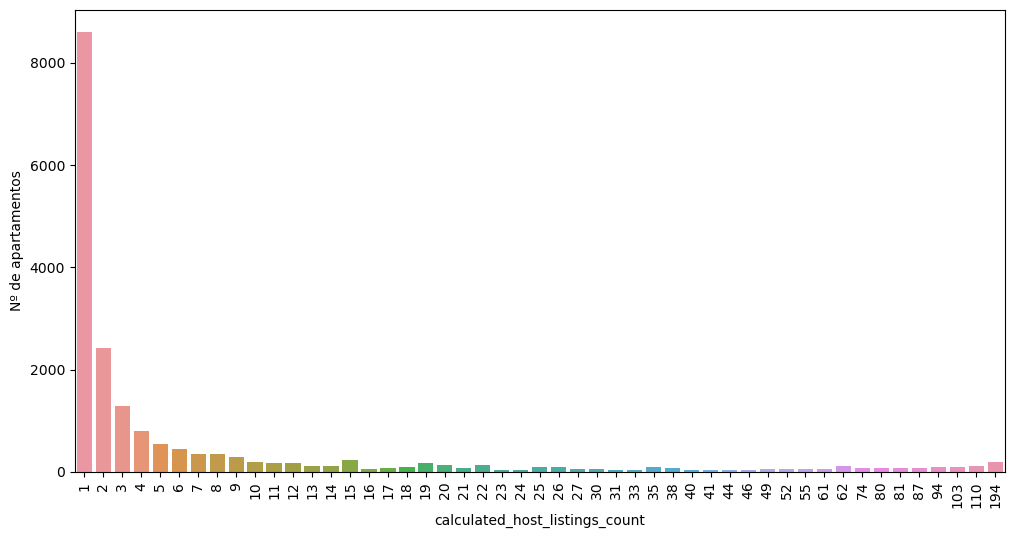

In [39]:
temp = df['calculated_host_listings_count'].value_counts().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x =temp.index, y = temp.values )
plt.xticks(rotation=90)
plt.ylabel('Nº de apartamentos')
#for n in range(0, temp.shape[0]):
#plt.text(temp.index[n],temp.values[n],temp.values[n],ha='center', va='bottom')  
plt.show()

In [40]:
df.loc[df["calculated_host_listings_count"] > 103]

,id,host_id,host_is_superhost,name,host_name,host_since,amenities,host_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,...,distrito,precio_m2,price_disc,accommodates_disc,propietarios_disc,price_accommodates,price_bedrooms,antiguedad_host,champion,segmentacion_mercado
1197,5638366,28038703,f,2 bedrooms next to Retiro Park ( Alcala ),Luxury Rentals Madrid,2015-02-20,"[""Wifi"", ""Dishes and silverware"", ""Iron"", ""Air...",112.0,Goya,Salamanca,...,Salamanca,7374,05muy_alto,03familias,04_grandes_empresas,43.750000,58.333333,6.56,False,mayoria_mercado
1350,6478676,28038703,f,"2 Bedrooms near famous Rastro "" La Latina""",Luxury Rentals Madrid,2015-02-20,"[""Shampoo"", ""Stove"", ""Long term stays allowed""...",112.0,Palacio,Centro,...,Centro,6144,05muy_alto,03familias,04_grandes_empresas,40.000000,80.000000,6.56,False,mayoria_mercado
3063,14228441,28038703,f,Opera ( Royal Palace ),Luxury Rentals Madrid,2015-02-20,"[""Shampoo"", ""Stove"", ""Long term stays allowed""...",112.0,Palacio,Centro,...,Centro,6144,05muy_alto,04grupos,04_grandes_empresas,27.333333,32.800000,6.56,False,mayoria_mercado
3305,15243380,28038703,f,"Cozy 1 bedroom apartment ""Calle Mayor II """,Luxury Rentals Madrid,2015-02-20,"[""Wifi"", ""Dishes and silverware"", ""Iron"", ""Air...",112.0,Palacio,Centro,...,Centro,6144,04alto,02parejas,04_grandes_empresas,56.000000,112.000000,6.56,False,mayoria_mercado
3881,17244920,28038703,f,"Centric apartment 1 bedroom ""Princesa V""",Luxury Rentals Madrid,2015-02-20,"[""Shampoo"", ""Stove"", ""Long term stays allowed""...",112.0,Gaztambide,Chamberí,...,Chamberí,6347,04alto,03familias,04_grandes_empresas,27.000000,108.000000,6.56,False,mayoria_mercado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17652,50337764,377605855,f,Mit House Rio Plaza IV en Madrid,Marco,2020-11-30,"[""Wifi"", ""Microwave"", ""Dishes and silverware"",...",194.0,Moscardó,Usera,...,Usera,2368,04alto,04grupos,04_grandes_empresas,15.333333,23.000000,0.78,False,mayoria_mercado
17653,50337765,377605855,f,Mit House Rio Plaza V en Madrid,Marco,2020-11-30,"[""Wifi"", ""Microwave"", ""Dishes and silverware"",...",194.0,Moscardó,Usera,...,Usera,2368,04alto,04grupos,04_grandes_empresas,14.666667,22.000000,0.78,False,mayoria_mercado
17654,50337766,377605855,f,Mit House Rio Plaza VI en Madrid,Marco,2020-11-30,"[""Wifi"", ""Microwave"", ""Dishes and silverware"",...",194.0,Moscardó,Usera,...,Usera,2368,04alto,04grupos,04_grandes_empresas,14.166667,21.250000,0.78,False,mayoria_mercado
17822,50629344,377605855,f,MIT House Chueca V in Madrid,Marco,2020-11-30,"[""Wifi"", ""Microwave"", ""Dishes and silverware"",...",194.0,Justicia,Centro,...,Centro,6144,04alto,04grupos,04_grandes_empresas,16.166667,32.333333,0.78,False,mayoria_mercado


In [41]:
df_listings_gz = pd.read_csv("./data/listings.csv.gz")
df_listings_gz.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [42]:
df_listings_gz.loc[df_listings_gz['calculated_host_listings_count'] >100 ,['name','host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified']]

,name,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified
1197,2 bedrooms next to Retiro Park ( Alcala ),28038703,https://www.airbnb.com/users/show/28038703,Luxury Rentals Madrid,2015-02-20,"Madrid, Community of Madrid, Spain",NaN,within an hour,99%,100%,f,https://a0.muscache.com/im/users/28038703/prof...,https://a0.muscache.com/im/users/28038703/prof...,Goya,112.0,112.0,"['email', 'phone', 'reviews', 'jumio']",t,t
1350,"2 Bedrooms near famous Rastro "" La Latina""",28038703,https://www.airbnb.com/users/show/28038703,Luxury Rentals Madrid,2015-02-20,"Madrid, Community of Madrid, Spain",NaN,within an hour,99%,100%,f,https://a0.muscache.com/im/users/28038703/prof...,https://a0.muscache.com/im/users/28038703/prof...,Goya,112.0,112.0,"['email', 'phone', 'reviews', 'jumio']",t,t
3063,Opera ( Royal Palace ),28038703,https://www.airbnb.com/users/show/28038703,Luxury Rentals Madrid,2015-02-20,"Madrid, Community of Madrid, Spain",NaN,within an hour,99%,100%,f,https://a0.muscache.com/im/users/28038703/prof...,https://a0.muscache.com/im/users/28038703/prof...,Goya,112.0,112.0,"['email', 'phone', 'reviews', 'jumio']",t,t
3305,"Cozy 1 bedroom apartment ""Calle Mayor II """,28038703,https://www.airbnb.com/users/show/28038703,Luxury Rentals Madrid,2015-02-20,"Madrid, Community of Madrid, Spain",NaN,within an hour,99%,100%,f,https://a0.muscache.com/im/users/28038703/prof...,https://a0.muscache.com/im/users/28038703/prof...,Goya,112.0,112.0,"['email', 'phone', 'reviews', 'jumio']",t,t
3881,"Centric apartment 1 bedroom ""Princesa V""",28038703,https://www.airbnb.com/users/show/28038703,Luxury Rentals Madrid,2015-02-20,"Madrid, Community of Madrid, Spain",NaN,within an hour,99%,100%,f,https://a0.muscache.com/im/users/28038703/prof...,https://a0.muscache.com/im/users/28038703/prof...,Goya,112.0,112.0,"['email', 'phone', 'reviews', 'jumio']",t,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17656,Mit House Rio Plaza V en Madrid,377605855,https://www.airbnb.com/users/show/377605855,Marco,2020-11-30,"Madrid, Community of Madrid, Spain",NaN,within an hour,97%,97%,f,https://a0.muscache.com/im/pictures/user/bd0ba...,https://a0.muscache.com/im/pictures/user/bd0ba...,NaN,194.0,194.0,"['email', 'phone', 'work_email']",t,t
17657,Mit House Rio Plaza VI en Madrid,377605855,https://www.airbnb.com/users/show/377605855,Marco,2020-11-30,"Madrid, Community of Madrid, Spain",NaN,within an hour,97%,97%,f,https://a0.muscache.com/im/pictures/user/bd0ba...,https://a0.muscache.com/im/pictures/user/bd0ba...,NaN,194.0,194.0,"['email', 'phone', 'work_email']",t,t
17825,MIT House Chueca V in Madrid,377605855,https://www.airbnb.com/users/show/377605855,Marco,2020-11-30,"Madrid, Community of Madrid, Spain",NaN,within an hour,97%,97%,f,https://a0.muscache.com/im/pictures/user/bd0ba...,https://a0.muscache.com/im/pictures/user/bd0ba...,NaN,194.0,194.0,"['email', 'phone', 'work_email']",t,t
18138,City Top Barquillo,102196656,https://www.airbnb.com/users/show/102196656,Welcomergroup,2016-11-02,"Madrid, Community of Madrid, Spain",Me encanta el turismo,within an hour,82%,96%,f,https://a0.muscache.com/im/pictures/user/6d888...,https://a0.muscache.com/im/pictures/user/6d888...,Ciutat Vella,180.0,180.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t


In [43]:
temp=df_listings_gz.loc[df_listings_gz['calculated_host_listings_count'] >40, ['name','host_name']] 
temp['host_name'].unique()

array(['Melvin Enrique', 'Luxury Rentals Madrid', 'Ivory', 'Raul',
       'Apartamentos Temporales', 'Emilio', 'Alterhome', 'Victoria&Fer',
       'Daniel', 'Leeways', 'Mario', 'Welcomergroup', 'MadreamsRent',
       'Sleep', 'Marco', 'Svetlana'], dtype=object)

In [44]:
temp.host_name.value_counts()

host_name
Marco                      194
Daniel                     142
Luxury Rentals Madrid      110
Welcomergroup              103
Ivory                       94
Svetlana                    87
Leeways                     81
Emilio                      74
Alterhome                   62
Raul                        61
Apartamentos Temporales     55
Melvin Enrique              52
MadreamsRent                49
Mario                       46
Victoria&Fer                44
Sleep                       41
Name: count, dtype: int64

###  2. Tipos de alquiler que ofrecen

In [45]:
df.loc[df['calculated_host_listings_count']>0,'room_type'].value_counts()

room_type
Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           160
Name: count, dtype: int64

In [46]:
round(df.loc[df['calculated_host_listings_count']>=0,'room_type'].value_counts(normalize = True)*100,2)

room_type
Entire home/apt    58.70
Private room       39.09
Shared room         1.36
Hotel room          0.85
Name: proportion, dtype: float64

In [47]:
df.loc[df['calculated_host_listings_count'] <=1,'room_type'].value_counts()

room_type
Entire home/apt    4638
Private room       3868
Shared room          85
Hotel room           13
Name: count, dtype: int64

In [48]:
df.loc[df['calculated_host_listings_count'] <= 1,'room_type'].value_counts(normalize=True)*100

room_type
Entire home/apt    53.905160
Private room       44.955834
Shared room         0.987913
Hotel room          0.151093
Name: proportion, dtype: float64

In [49]:
df.loc[(df['calculated_host_listings_count'] > 1) & (df['calculated_host_listings_count'] < 6), 'room_type'].value_counts()

room_type
Entire home/apt    2632
Private room       2356
Shared room          61
Hotel room           36
Name: count, dtype: int64

In [50]:
df.loc[(df['calculated_host_listings_count'] > 1) & (df['calculated_host_listings_count'] < 6), 'room_type'].value_counts(normalize=True)*100

room_type
Entire home/apt    51.760079
Private room       46.332350
Shared room         1.199607
Hotel room          0.707965
Name: proportion, dtype: float64

In [51]:
df.loc[(df['calculated_host_listings_count'] > 5) & (df['calculated_host_listings_count'] < 15), 'room_type'].value_counts()

room_type
Entire home/apt    1492
Private room        585
Shared room          84
Hotel room           58
Name: count, dtype: int64

In [52]:
df.loc[(df['calculated_host_listings_count'] > 5) & (df['calculated_host_listings_count'] < 15), 'room_type'].value_counts(normalize=True)*100

room_type
Entire home/apt    67.237494
Private room       26.363227
Shared room         3.785489
Hotel room          2.613790
Name: proportion, dtype: float64

In [53]:
df.loc[(df['calculated_host_listings_count'] > 14), 'room_type'].value_counts()

room_type
Entire home/apt    2336
Private room        581
Hotel room           53
Shared room          28
Name: count, dtype: int64

In [54]:
df.loc[(df['calculated_host_listings_count'] > 14), 'room_type'].value_counts(normalize=True)*100

room_type
Entire home/apt    77.918612
Private room       19.379586
Hotel room          1.767845
Shared room         0.933956
Name: proportion, dtype: float64

### Distribución de propiedades por distritos

#### Entire home/apt 

In [55]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Entire home/apt'].nlargest(5)

distrito
Centro        5994
Salamanca      880
Chamberí       644
Arganzuela     577
Tetuán         478
Name: count, dtype: int64

In [56]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Entire home/apt'].nlargest(5)/len(df)*100,2)

distrito
Centro        31.70
Salamanca      4.65
Chamberí       3.41
Arganzuela     3.05
Tetuán         2.53
Name: count, dtype: float64

In [57]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Entire home/apt'].nsmallest(5).sort_values(ascending=False)

distrito
Barajas              42
Villaverde           42
Villa de Vallecas    28
Moratalaz            26
Vicálvaro            13
Name: count, dtype: int64

In [58]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Entire home/apt'].nsmallest(5).sort_values(ascending=False)/len(df)*100,2)

distrito
Barajas              0.22
Villaverde           0.22
Villa de Vallecas    0.15
Moratalaz            0.14
Vicálvaro            0.07
Name: count, dtype: float64

#### Private room 

In [59]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Private room'].nlargest(5)

distrito
Centro           2181
Arganzuela        481
Chamberí          475
Carabanchel       413
Ciudad Lineal     380
Name: count, dtype: int64

In [60]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Private room'].nlargest(5)/len(df),2)*100

distrito
Centro           12.0
Arganzuela        3.0
Chamberí          3.0
Carabanchel       2.0
Ciudad Lineal     2.0
Name: count, dtype: float64

In [61]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Private room'].nsmallest(5).sort_values(ascending=False)

distrito
Villaverde           131
Barajas              103
Moratalaz            103
Villa de Vallecas     74
Vicálvaro             57
Name: count, dtype: int64

In [62]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Private room'].nsmallest(5).sort_values(ascending=False)/len(df),2)*100

distrito
Villaverde           1.0
Barajas              1.0
Moratalaz            1.0
Villa de Vallecas    0.0
Vicálvaro            0.0
Name: count, dtype: float64

#### Shared room

In [63]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Shared room'].nlargest(5)

distrito
Centro           131
Chamberí          22
Villaverde        12
Ciudad Lineal     11
Latina            11
Name: count, dtype: int64

In [64]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Shared room'].nlargest(5)/len(df),2)*100

distrito
Centro           1.0
Chamberí         0.0
Villaverde       0.0
Ciudad Lineal    0.0
Latina           0.0
Name: count, dtype: float64

In [65]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Shared room'].nsmallest(5).sort_values(ascending=False)

distrito
Barajas                  2
Fuencarral - El Pardo    1
Hortaleza                1
Moratalaz                1
Vicálvaro                1
Name: count, dtype: int64

In [66]:
temp = df.groupby('distrito')['room_type'].value_counts()
round(temp[:,'Shared room'].nsmallest(5).sort_values(ascending=False)/len(df),2)*100

distrito
Barajas                  0.0
Fuencarral - El Pardo    0.0
Hortaleza                0.0
Moratalaz                0.0
Vicálvaro                0.0
Name: count, dtype: float64

#### Hotel room

In [67]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Hotel room'].nlargest(5)

distrito
Centro       126
Salamanca     11
Chamberí       7
Hortaleza      5
Chamartín      4
Name: count, dtype: int64

In [68]:
temp = df.groupby('distrito')['room_type'].value_counts()
(temp[:,'Hotel room'].nlargest(5)/len(df)).round(2)*100

distrito
Centro       1.0
Salamanca    0.0
Chamberí     0.0
Hortaleza    0.0
Chamartín    0.0
Name: count, dtype: float64

In [69]:
temp = df.groupby('distrito')['room_type'].value_counts()
temp[:,'Hotel room'].nsmallest(5)

distrito
Ciudad Lineal         1
Moncloa - Aravaca     1
Moratalaz             1
Puente de Vallecas    1
Villaverde            1
Name: count, dtype: int64

In [70]:
temp = df.groupby('distrito')['room_type'].value_counts()
(temp[:,'Hotel room'].nsmallest(5)/len(df)).round(2)*100

distrito
Ciudad Lineal         0.0
Moncloa - Aravaca     0.0
Moratalaz             0.0
Puente de Vallecas    0.0
Villaverde            0.0
Name: count, dtype: float64

## Tipo de vivienda

### 1. Media de Nº de habitaciones 

In [71]:
df.groupby('room_type')['bedrooms'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,11098.0,1.63,0.88,1.0,1.0,1.0,2.0,10.0
Hotel room,160.0,1.14,0.53,1.0,1.0,1.0,1.0,4.0
Private room,7390.0,1.12,0.60,1.0,1.0,1.0,1.0,18.0
Shared room,258.0,1.00,0.00,1.0,1.0,1.0,1.0,1.0


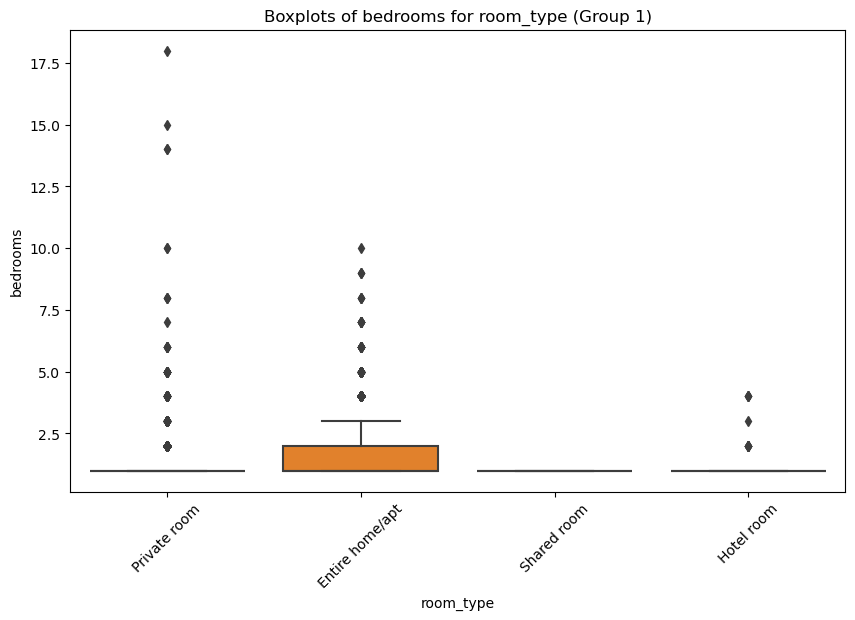

In [72]:
plot_grouped_boxplots(df,'room_type',"bedrooms")

### 2. Media de baños

In [73]:
df.groupby('room_type')['bathrooms'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,11098.0,1.31,0.60,0.0,1.0,1.0,1.50,10.0
Hotel room,160.0,1.09,0.32,1.0,1.0,1.0,1.00,3.0
Private room,7390.0,1.22,0.64,0.0,1.0,1.0,1.00,14.0
Shared room,258.0,1.61,1.17,0.0,1.0,1.0,1.88,8.0


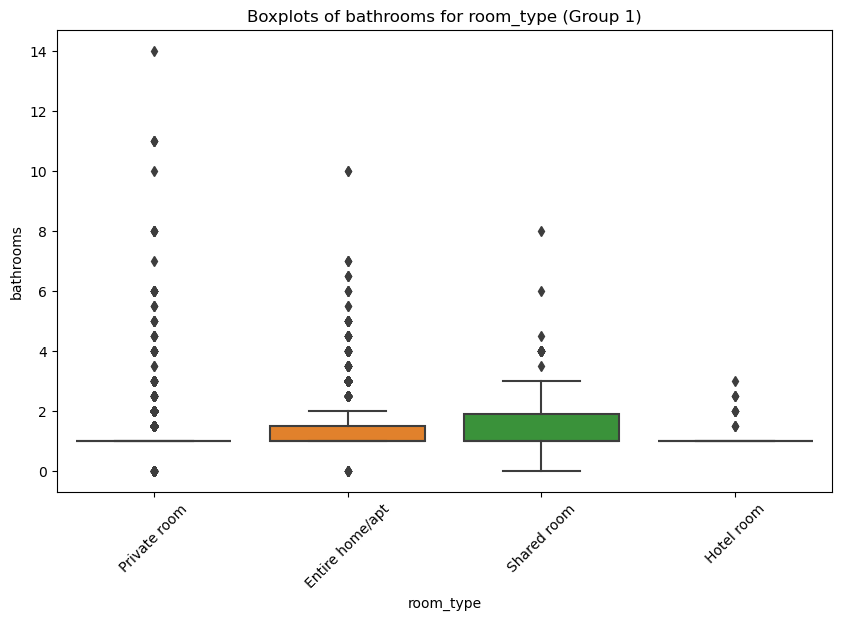

In [74]:
plot_grouped_boxplots(df,'room_type',"bathrooms")

### 3. Media de nº de camas

In [75]:
df.groupby('room_type')['beds'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,11098.0,2.36,1.53,0.0,1.0,2.0,3.0,18.0
Hotel room,160.0,1.51,1.09,0.0,1.0,1.0,2.0,8.0
Private room,7390.0,1.21,0.84,0.0,1.0,1.0,1.0,24.0
Shared room,258.0,3.00,2.79,0.0,1.0,2.0,4.0,12.0


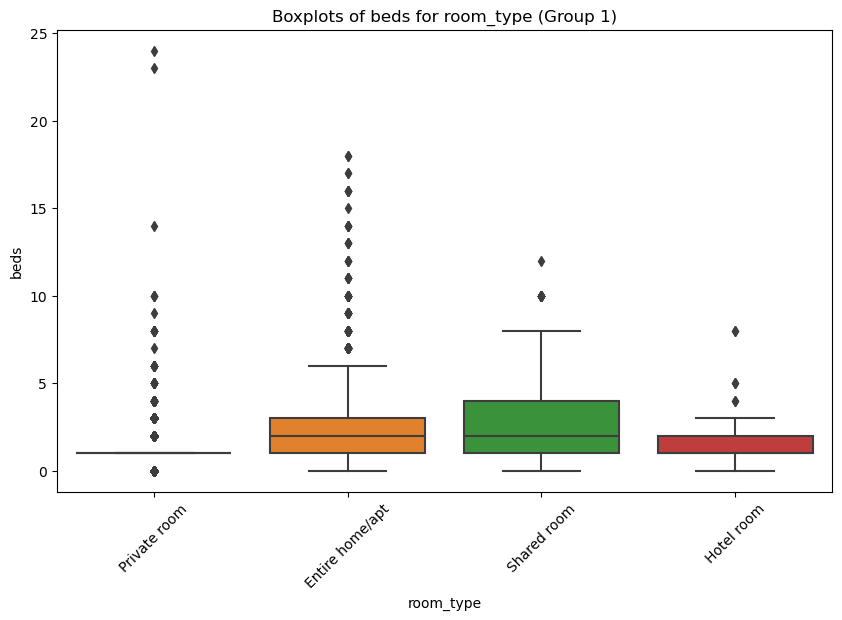

In [76]:
plot_grouped_boxplots(df,'room_type',"beds")

### 4. Media de potenciales huéspedes

In [77]:
df.groupby('room_type')['accommodates'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,11098.0,4.02,1.95,1.0,2.0,4.0,5.0,16.0
Hotel room,160.0,2.48,1.90,1.0,2.0,2.0,3.0,14.0
Private room,7390.0,1.75,0.93,1.0,1.0,2.0,2.0,16.0
Shared room,258.0,2.12,1.78,1.0,1.0,1.5,2.0,10.0


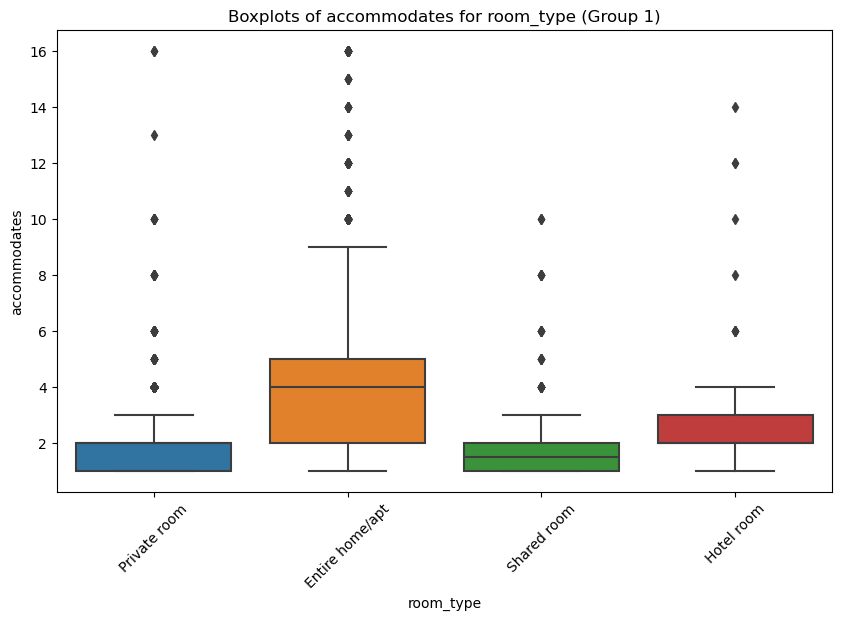

In [78]:
plot_grouped_boxplots(df,'room_type',"accommodates")

### 5. Superficie media vivienda

In [79]:
# Hay un problema con los anuncios de alquiler de habitaciones para poder estimar los m2 en base al número de habitaciones.
df.loc[df['room_type']=='Private room','bedrooms'].unique()

array([ 1,  3,  2,  4,  7, 14,  6,  5,  8, 15, 10, 18], dtype=int64)

In [80]:
df.loc[df['room_type']=='Private room',['bedrooms','price']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,7390.0,1.116644,0.599482,1.0,1.0,1.0,1.0,18.0
price,7390.0,66.648184,115.854836,1.0,23.0,33.0,50.0,999.0


Excluyo a las ofertas de alquiler de habitaciones al no poder saber qué m2 tiene en total el piso tan solo por el hecho de que se alquile una habitación.

In [81]:
# Lo saco de df_home en donde ya lo tengo
df_home.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado', 'sup_m2_est',
       'precio_est', 'price_x_sup'],
      dtype='object')

In [82]:
round(df_home['sup_m2_est'].describe(),2)

count    11098.00
mean        62.88
std         18.56
min         50.00
25%         50.00
50%         50.00
75%         70.00
max        150.00
Name: sup_m2_est, dtype: float64

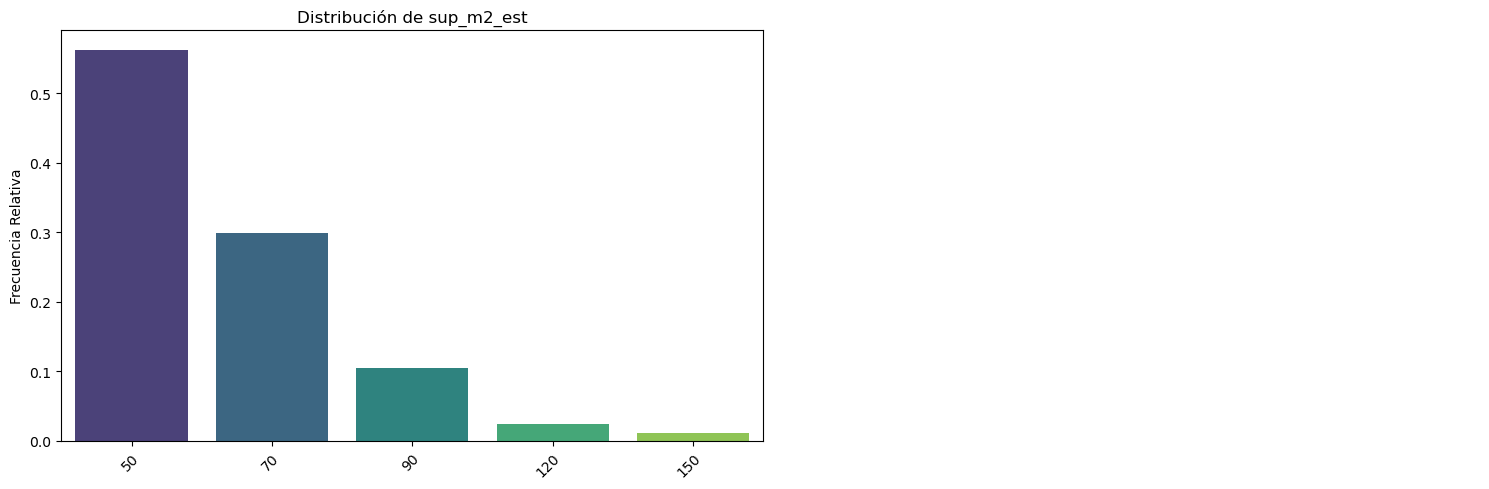

In [83]:
pinta_distribucion_categoricas_cgpt1(df_home,['sup_m2_est'],relativa=True)

## Precios medios de alquiler

### 1. Precio medio de alquiler por tipo de oferta

In [84]:
df.groupby('room_type')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,11098.0,111.51,107.47,1.0,60.00,82.0,121.0,999.0
Hotel room,160.0,142.22,131.57,0.0,57.00,104.5,169.0,532.0
Private room,7390.0,66.65,115.85,1.0,23.00,33.0,50.0,999.0
Shared room,258.0,61.90,121.53,1.0,15.25,23.0,40.0,900.0


(2,)


c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


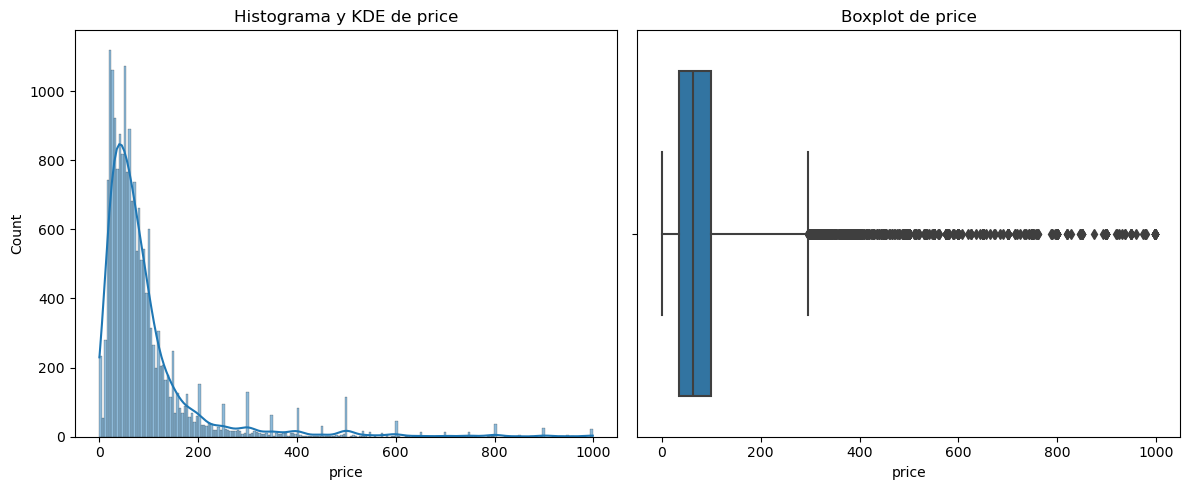

In [85]:
plot_combined_graphs(df,['price'], whisker_width=3)

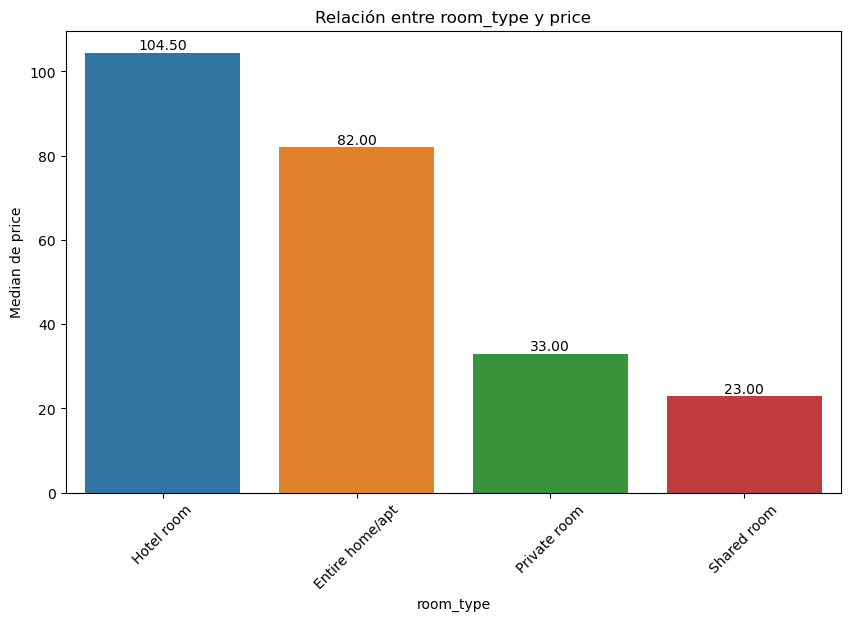

In [86]:
plot_categorical_numerical_relationship(df,"room_type","price", measure='median',show_values=True)

#### Comprobación de la influencia de los outliers en los valores medios de los precios

In [87]:
# El número de precios que está por encima de 300€ que es aproximadamente 3xIQR
df.loc[df['price'] > 300].count()

id                                831
host_id                           831
host_is_superhost                 831
name                              831
host_name                         831
host_since                        831
amenities                         831
host_listings_count               831
neighbourhood_cleansed            831
neighbourhood_group_cleansed      831
latitude                          831
longitude                         831
property_type                     831
room_type                         831
accommodates                      831
bedrooms                          831
beds                              831
price                             831
minimum_nights                    831
maximum_nights                    831
number_of_reviews                 831
review_scores_rating              296
calculated_host_listings_count    831
bathrooms                         831
distrito                          831
precio_m2                         831
price_disc  

In [88]:
# % de valores que están por encima de los 300€ que representa 3xIQR
831/len(df)*100

4.395430022215169

#### Media por tipo de oferta por encima de 3IQR

In [89]:
# Media por tipo de oferta por encima de 3IQR
lista_oferta = df['room_type'].unique()
precios_superiores_3IQR(df, 'price','room_type', lista_oferta)

La media para valores por encima de 3xIQR en Private room es 491.1290322580645
La media para valores por encima de 3xIQR en Entire home/apt es 494.4943181818182
La media para valores por encima de 3xIQR en Shared room es 498.8
La media para valores por encima de 3xIQR en Hotel room es 445.89473684210526


#### Media por tipo de oferta por debajo de 3IQR

In [90]:

lista_oferta = df['room_type'].unique()
precios_inferiores_3IQR(df, 'price','room_type', lista_oferta)

La media para valores por encima de 3xIQR en Private room es 42.16474581365392
La media para valores por encima de 3xIQR en Entire home/apt es 92.37668183538317
La media para valores por encima de 3xIQR en Shared room es 34.93159670781893
La media para valores por encima de 3xIQR en Hotel room es 101.30496453900709


In [91]:
# Creo una nueva columna donde segmento el mercado por precio sepando los outliers del resto y anulando el efecto champions
df.loc[:,'name'] = df['name'].fillna('sin_datos')
df.loc[:,"champion"] = df["name"].apply(lambda x: "champions" in x or "champion" in x)


In [92]:
df.shape

(18906, 34)

In [93]:
condiciones = [(df['price']<=300) & (df['champion'] == False),
                (df['price']>300) & (df['champion'] == False),
                (df['champion'] == True)]
resultado = ['mayoria_mercado','lujo','oportunismo_champion']

df.loc[:,'segmentacion_mercado'] = np.select(condiciones,resultado,default=-999)

In [94]:
df.shape

(18906, 34)

In [95]:
df.segmentacion_mercado.value_counts()

segmentacion_mercado
mayoria_mercado         18042
lujo                      794
oportunismo_champion       70
Name: count, dtype: int64

In [96]:
df.segmentacion_mercado.value_counts(normalize=True).round(2)*100

segmentacion_mercado
mayoria_mercado         95.0
lujo                     4.0
oportunismo_champion     0.0
Name: proportion, dtype: float64

In [97]:
df.groupby(['segmentacion_mercado','room_type'])['price'].describe().round(2)

count    mean     std    min    25%  \
segmentacion_mercado room_type                                                
lujo                 Entire home/apt    450.0  520.23  197.80  301.0  360.0   
                     Hotel room          18.0  454.00  101.43  303.0  345.5   
                     Private room       311.0  529.79  173.67  310.0  400.0   
                     Shared room         15.0  498.80  151.58  322.0  385.0   
mayoria_mercado      Entire home/apt  10623.0   93.73   51.90    1.0   59.0   
                     Hotel room         142.0  102.70   65.56    0.0   57.0   
                     Private room      7037.0   44.42   44.19    1.0   22.0   
                     Shared room        240.0   35.21   42.52    1.5   15.0   
oportunismo_champion Entire home/apt     25.0  310.18  320.89    1.0    2.0   
                     Private room        42.0  361.04  234.77    1.0  157.5   
                     Shared room          3.0   12.33   17.93    1.0    2.0   

                                        50%     75%    max  
segmentacion_mercado room_type                              
lujo                 Entire home/apt  467.0  600.00  999.0  
                     Hotel room       532.0  532.00  532.0  
                     Private room     500.0  600.00  999.0  
                     Shared room      500.0  525.00  900.0  
mayoria_mercado      Entire home/apt   80.0  114.00  300.0  
                     Hotel room        88.0  144.75  300.0  
                     Private room      31.0   47.00  300.0  
                     Shared room       21.0   34.25  250.0  
oportunismo_champion Entire home/apt  300.0  500.00  920.0  
                     Private room     400.0  500.00  800.0  
                     Shared room        3.0   18.00   33.0

### 2. Precio medio por superficie de vivienda

In [98]:
df_home.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado', 'sup_m2_est',
       'precio_est', 'price_x_sup'],
      dtype='object')

In [99]:
# Lo hago solo para los alquieres de las viviendas completas ya que para los otros no puedo estimarlo.

df_home.groupby(['sup_m2_est','segmentacion_mercado'])['price'].describe().round(2)

count    mean     std     min     25%  \
sup_m2_est segmentacion_mercado                                           
50         lujo                   120.0  601.19  201.84  330.00  487.50   
           mayoria_mercado       6116.0   77.06   37.50    1.00   53.00   
           oportunismo_champion    10.0  422.20  248.91    1.00  317.75   
70         lujo                   128.0  561.95  205.71  302.00  400.00   
           mayoria_mercado       3175.0  106.12   52.15    1.00   70.00   
           oportunismo_champion     9.0  335.90  398.59    1.00    3.00   
90         lujo                   100.0  470.42  182.32  301.00  344.25   
           mayoria_mercado       1053.0  134.52   65.17    1.00   86.00   
           oportunismo_champion     4.0  126.10  249.27    1.00    1.30   
120        lujo                    55.0  403.98  114.98  305.00  320.00   
           mayoria_mercado        206.0  162.22   70.02    1.00  120.00   
           oportunismo_champion     2.0    2.48    0.67    2.00    2.24   
150        lujo                    47.0  441.94  151.11  306.00  350.00   
           mayoria_mercado         73.0  169.76   89.54    1.11  109.00   

                                    50%     75%     max  
sup_m2_est segmentacion_mercado                          
50         lujo                  542.50  745.50  999.00  
           mayoria_mercado        70.00   90.00  300.00  
           oportunismo_champion  425.00  575.00  800.00  
70         lujo                  500.00  655.75  999.00  
           mayoria_mercado        97.00  131.00  300.00  
           oportunismo_champion  120.00  675.00  920.00  
90         lujo                  399.00  514.00  999.00  
           mayoria_mercado       127.00  175.00  300.00  
           oportunismo_champion    1.70  126.50  500.00  
120        lujo                  380.00  448.50  978.00  
           mayoria_mercado       162.00  205.75  300.00  
           oportunismo_champion    2.48    2.71    2.95  
150        lujo                  397.00  474.00  978.00  
           mayoria_mercado       189.00  243.00  300.00

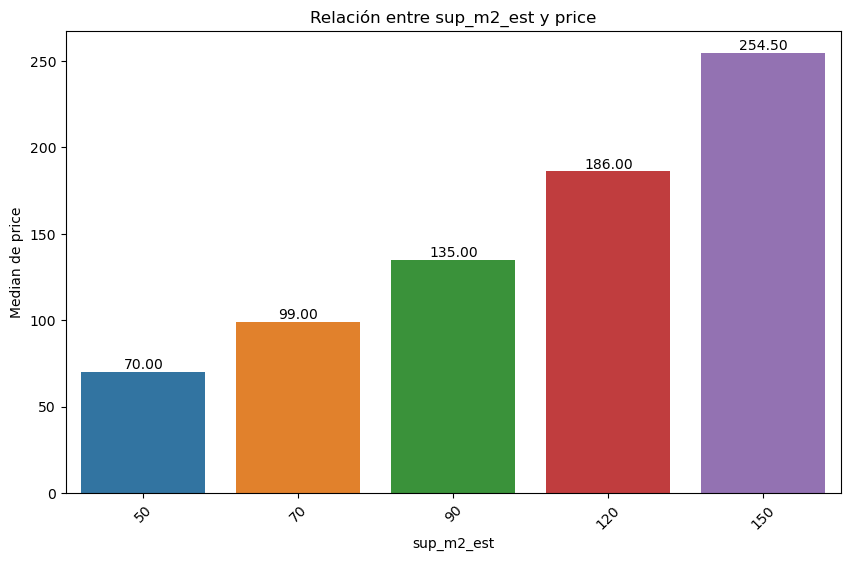

In [100]:
plot_categorical_numerical_relationship(df_home,"sup_m2_est","price", measure='median',show_values=True)

In [101]:
df_home_inferior3IQR = df_home.loc[df_home['price'] <=300]

In [102]:
df_home_inferior3IQR.shape

(10636, 37)

In [103]:
df_home_inferior3IQR.groupby('sup_m2_est')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
sup_m2_est,,,,,,,,
50,6119.0,77.082756,37.612895,1.000,53.0,70.0,90.00,300.0
70,3180.0,105.991315,52.236105,1.000,70.0,97.0,131.00,300.0
90,1056.0,134.145809,65.464512,1.000,86.0,126.0,175.00,300.0
120,208.0,160.680851,71.410310,1.000,119.0,160.5,205.25,300.0
150,73.0,169.755753,89.536229,1.114,109.0,189.0,243.00,300.0


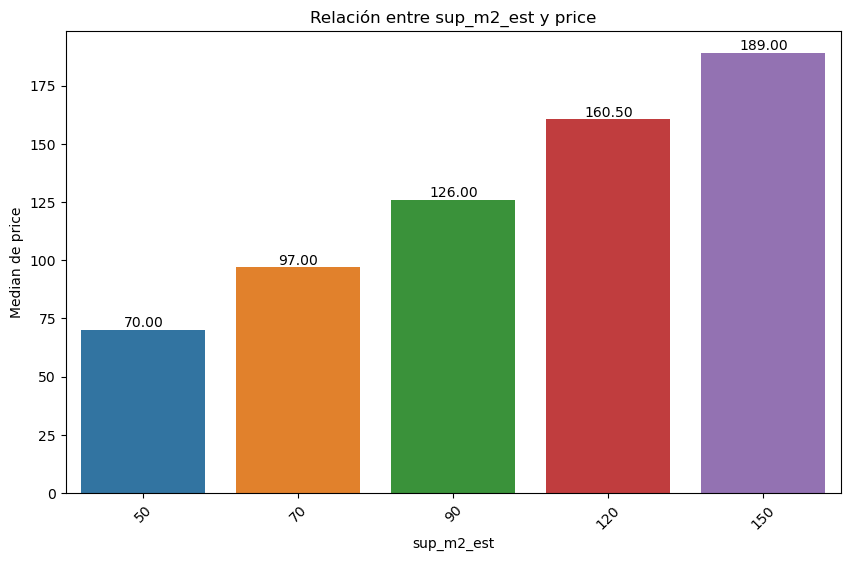

In [104]:
plot_categorical_numerical_relationship(df_home_inferior3IQR,"sup_m2_est","price", measure='median',show_values=True)

### 3. Precio medio en base al número de huéspedes

#### Alquileres de habitaciones

In [105]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

In [106]:
df.groupby(['segmentacion_mercado','room_type'])['price_accommodates'].describe().round(2)

count    mean     std    min     25%  \
segmentacion_mercado room_type                                                 
lujo                 Entire home/apt    450.0  118.99   88.57  19.38   55.83   
                     Hotel room          18.0  260.04  105.99  21.64  266.00   
                     Private room       311.0  262.51  144.18  58.33  175.00   
                     Shared room         15.0  235.08  141.97  80.00  125.00   
mayoria_mercado      Entire home/apt  10623.0   26.38   15.61   0.07   17.00   
                     Hotel room         142.0   51.35   40.02   0.00   27.31   
                     Private room      7037.0   28.03   27.38   0.10   15.00   
                     Shared room        240.0   23.96   30.74   0.41    9.00   
oportunismo_champion Entire home/apt     25.0   91.90  107.93   0.20    0.40   
                     Private room        42.0  171.49  121.40   0.25   78.12   
                     Shared room          3.0    5.83    9.24   0.25    0.50   

                                         50%     75%    max  
segmentacion_mercado room_type                               
lujo                 Entire home/apt   97.92  162.50  846.0  
                     Hotel room       266.00  266.00  532.0  
                     Private room     225.00  340.00  999.0  
                     Shared room      225.00  311.00  550.0  
mayoria_mercado      Entire home/apt   23.00   32.00  300.0  
                     Hotel room        42.75   63.00  244.0  
                     Private room      20.50   30.00  300.0  
                     Shared room       19.25   25.00  250.0  
oportunismo_champion Entire home/apt   71.43  150.00  400.0  
                     Private room     182.50  250.00  500.0  
                     Shared room        0.75    8.62   16.5

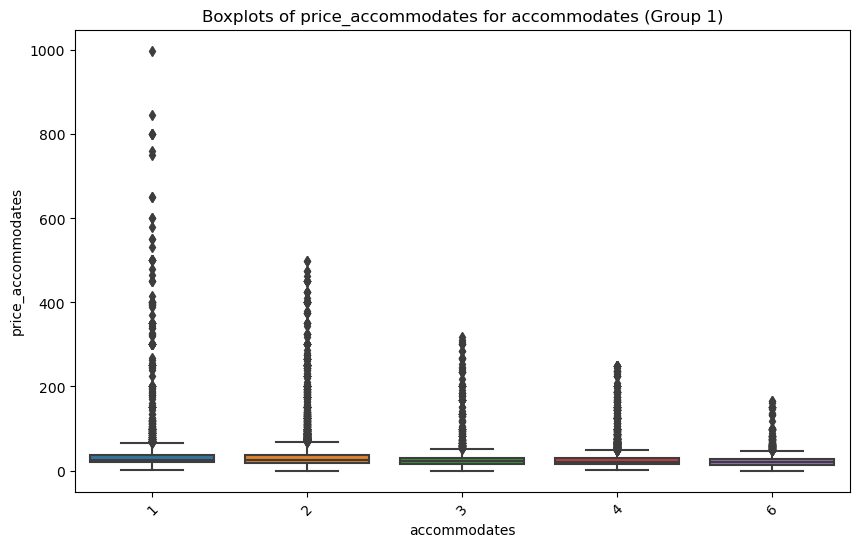

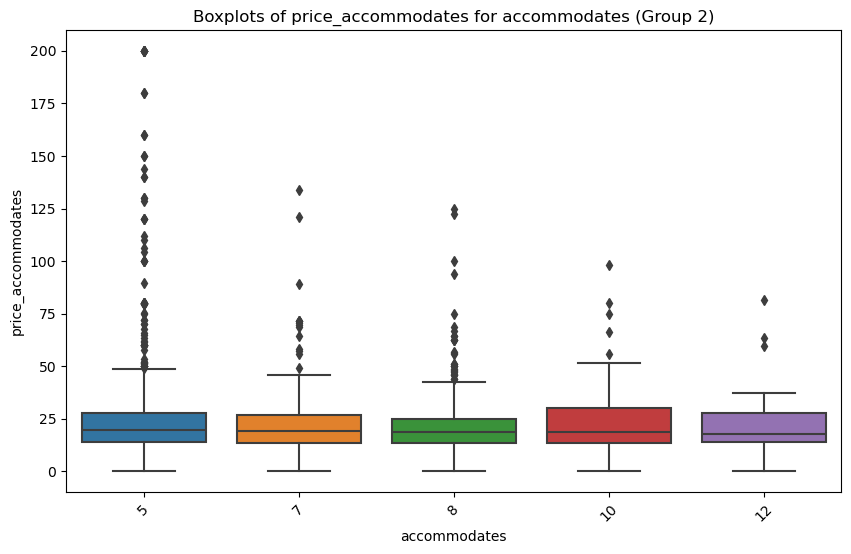

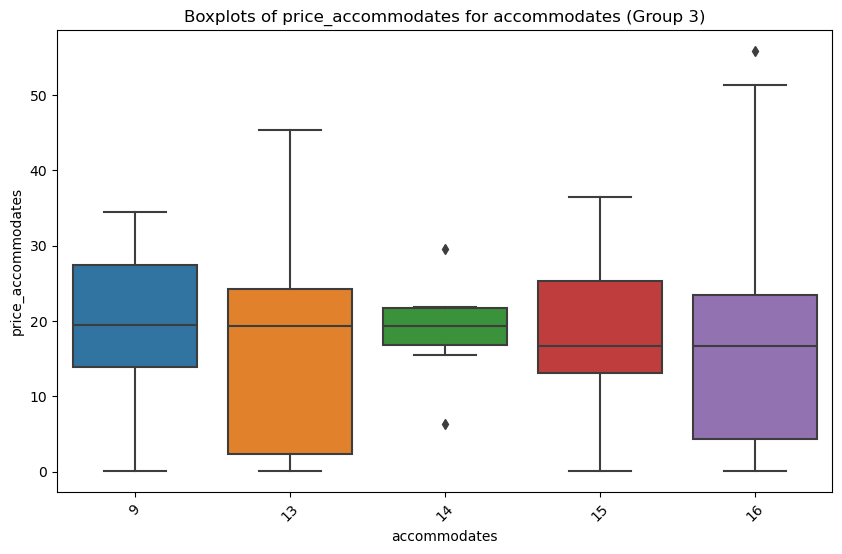

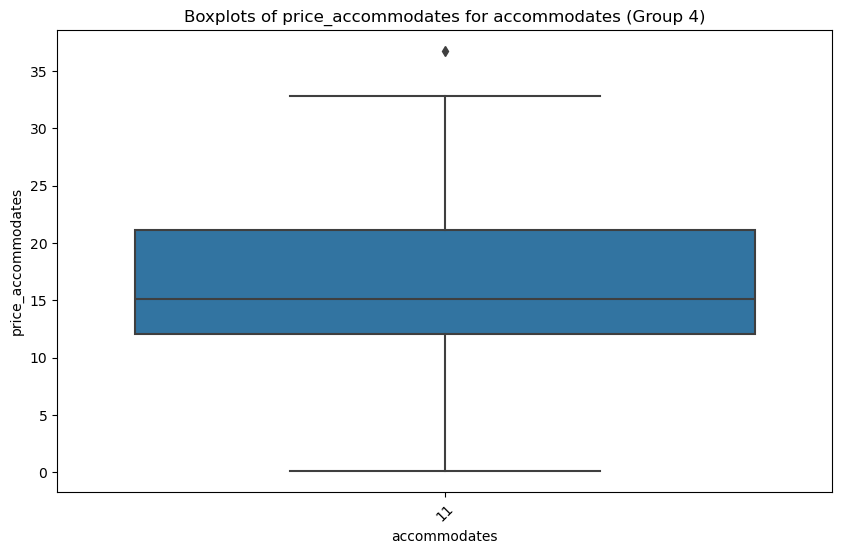

In [107]:
plot_grouped_boxplots(df,"accommodates","price_accommodates")

### 4. Precio medio por distrito

In [108]:
temp = df.groupby(['distrito','room_type','segmentacion_mercado'])['price'].describe().reset_index()
temp

,distrito,room_type,segmentacion_mercado,count,mean,std,min,25%,50%,75%,max
0,Arganzuela,Entire home/apt,lujo,12.0,547.083333,190.148965,350.00,390.0,500.0,605.0,975.0
1,Arganzuela,Entire home/apt,mayoria_mercado,564.0,77.837294,37.158152,1.00,55.0,71.0,90.0,300.0
2,Arganzuela,Entire home/apt,oportunismo_champion,1.0,1.000000,NaN,1.00,1.0,1.0,1.0,1.0
3,Arganzuela,Hotel room,mayoria_mercado,2.0,19.000000,26.870058,0.00,9.5,19.0,28.5,38.0
4,Arganzuela,Private room,lujo,13.0,460.846154,159.131940,320.00,350.0,414.0,490.0,900.0
...,...,...,...,...,...,...,...,...,...,...,...
147,Villaverde,Entire home/apt,mayoria_mercado,40.0,69.354875,48.693602,5.73,46.5,59.5,81.0,250.0
148,Villaverde,Hotel room,mayoria_mercado,1.0,200.000000,NaN,200.00,200.0,200.0,200.0,200.0
149,Villaverde,Private room,lujo,2.0,750.000000,212.132034,600.00,675.0,750.0,825.0,900.0
150,Villaverde,Private room,mayoria_mercado,129.0,26.744186,18.752199,1.00,15.0,22.0,30.0,140.0


#### Precio medio Entire home/apt y mayoria_mercado por distrito

In [109]:
# Precio medio por Entire home/apt
print(temp.query('room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"')[['distrito','25%','50%','mean','75%']].nlargest(60, ['25%','50%','mean','75%']).round(2))


                  distrito    25%   50%    mean     75%
107              Salamanca  71.00  95.0  112.30  142.00
136              Vicálvaro  60.50  99.0  106.82  135.00
40                Chamberí  60.00  89.0  100.36  125.00
81       Moncloa - Aravaca  60.00  87.0  101.88  126.00
102                 Retiro  60.00  85.0   98.05  123.00
22                  Centro  60.00  83.0   95.97  116.00
32               Chamartín  60.00  80.0   95.27  113.75
65               Hortaleza  59.75  75.5   87.87  112.00
9                  Barajas  58.00  75.0   88.49  110.00
58   Fuencarral - El Pardo  56.50  71.0   86.70  100.00
123                 Tetuán  56.00  73.0   86.57  100.00
1               Arganzuela  55.00  71.0   77.84   90.00
49           Ciudad Lineal  53.00  70.0   85.19  100.00
88               Moratalaz  50.00  70.0   70.57   80.00
15             Carabanchel  50.00  67.0   78.94   90.00
73                  Latina  50.00  61.5   69.58   80.00
142      Villa de Vallecas  49.50  71.5   78.72 

#### Precio medio Private_room y mayoría_mercado por distrito

In [110]:
# Media para Private room
print(temp.query('room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"')[['distrito','25%','50%','mean','75%']].nlargest(60, ['25%','50%','mean','75%']).round(2))

                  distrito    25%   50%   mean    75%
44                Chamberí  26.00  38.5  51.99  50.00
27                  Centro  26.00  36.0  48.83  54.00
110              Salamanca  25.50  35.0  44.24  47.50
69               Hortaleza  25.00  34.0  55.29  55.00
36               Chamartín  25.00  33.0  50.59  50.00
11                 Barajas  25.00  33.0  37.72  40.00
104                 Retiro  23.00  31.0  41.64  44.25
5               Arganzuela  23.00  30.5  39.84  43.00
117  San Blas - Canillejas  22.00  35.0  71.20  72.00
125                 Tetuán  22.00  31.0  45.49  50.00
84       Moncloa - Aravaca  20.00  30.0  41.55  45.00
61   Fuencarral - El Pardo  20.00  29.5  45.54  42.25
144      Villa de Vallecas  20.00  29.5  43.81  39.00
52           Ciudad Lineal  20.00  26.0  37.79  35.00
18             Carabanchel  20.00  25.0  37.51  36.75
131                  Usera  20.00  25.0  33.18  33.75
98      Puente de Vallecas  20.00  25.0  31.59  32.00
75                  Latina  

#### Precio medio Shared y mayoría_mercado room por distrito

In [111]:
print(temp.query('room_type == "Shared room" and segmentacion_mercado == "mayoria_mercado"')[['distrito','25%','50%','mean','75%']].nlargest(60, ['25%','50%','mean','75%']).round(2))

                  distrito     25%    50%    mean     75%
141              Vicálvaro  200.00  200.0  200.00  200.00
55           Ciudad Lineal   35.50   40.0   70.43   82.50
92               Moratalaz   35.00   35.0   35.00   35.00
13                 Barajas   33.50   39.0   39.00   44.50
71               Hortaleza   31.00   31.0   31.00   31.00
86       Moncloa - Aravaca   27.25   31.5   31.50   35.75
120  San Blas - Canillejas   20.00   45.0   77.93   73.00
127                 Tetuán   20.00   21.0   54.00   30.00
78                  Latina   18.00   33.0   33.78   46.00
7               Arganzuela   18.00   27.0   47.22   50.00
47                Chamberí   18.00   22.5   39.98   26.25
100     Puente de Vallecas   18.00   20.0   24.89   25.00
112              Salamanca   17.50   22.0   26.88   37.75
134                  Usera   16.50   23.0   28.17   40.00
38               Chamartín   15.00   30.0   28.85   45.00
20             Carabanchel   15.00   20.0   70.20   52.00
63   Fuencarra

#### Precio medio Hotel room por distrito

In [112]:
print(temp.query('room_type == "Hotel room" ')[['distrito','25%','50%','mean','75%']].nlargest(60, ['25%','50%','mean','75%']).round(2))

               distrito    25%    50%    mean    75%
96   Puente de Vallecas  350.0  350.0  350.00  350.0
24               Centro  344.0  532.0  460.12  532.0
148          Villaverde  200.0  200.0  200.00  200.0
82    Moncloa - Aravaca  117.0  117.0  117.00  117.0
108           Salamanca   99.0  146.0  151.91  216.0
34            Chamartín   95.5  107.0  111.50  123.0
42             Chamberí   70.0   74.0   76.14   82.0
25               Centro   57.0   90.0  104.89  148.0
50        Ciudad Lineal   28.0   28.0   28.00   28.0
67            Hortaleza   22.0   23.0   23.60   23.0
3            Arganzuela    9.5   19.0   19.00   28.5
89            Moratalaz    0.0    0.0    0.00    0.0


### 5. Precio medio de alquiler por tipo de propietario

In [113]:
condiciones = [(df['calculated_host_listings_count'] <=1),
               (df['calculated_host_listings_count']>1) & (df['calculated_host_listings_count'] <6),
               (df['calculated_host_listings_count']> 5) & (df['calculated_host_listings_count'] <15),
               (df['calculated_host_listings_count']>14)] 

resultados = ['01_individual','02_pequeños_inversores','03_grandes_inversores','04_grandes_empresas']

df.loc[:,'propietarios_disc'] = np.select(condiciones, resultados, default=-999)

In [114]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

In [115]:
# Frecuencia absoluta
df.groupby('segmentacion_mercado')['room_type'].value_counts()

segmentacion_mercado  room_type      
lujo                  Entire home/apt      450
                      Private room         311
                      Hotel room            18
                      Shared room           15
mayoria_mercado       Entire home/apt    10623
                      Private room        7037
                      Shared room          240
                      Hotel room           142
oportunismo_champion  Private room          42
                      Entire home/apt       25
                      Shared room            3
Name: count, dtype: int64

In [116]:
# Frecuencia relativa
df.groupby('segmentacion_mercado')['room_type'].value_counts(normalize=True).round(2)*100

segmentacion_mercado  room_type      
lujo                  Entire home/apt    57.0
                      Private room       39.0
                      Hotel room          2.0
                      Shared room         2.0
mayoria_mercado       Entire home/apt    59.0
                      Private room       39.0
                      Shared room         1.0
                      Hotel room          1.0
oportunismo_champion  Private room       60.0
                      Entire home/apt    36.0
                      Shared room         4.0
Name: proportion, dtype: float64

In [117]:
df.groupby('segmentacion_mercado')['room_type'].describe()

,count,unique,top,freq
segmentacion_mercado,,,,
lujo,794,4,Entire home/apt,450
mayoria_mercado,18042,4,Entire home/apt,10623
oportunismo_champion,70,3,Private room,42


In [118]:
df.groupby(['propietarios_disc','segmentacion_mercado'])['room_type'].value_counts()

propietarios_disc       segmentacion_mercado  room_type      
01_individual           lujo                  Private room        235
                                              Entire home/apt     227
                                              Shared room          11
                                              Hotel room            1
                        mayoria_mercado       Entire home/apt    4387
                                              Private room       3599
                                              Shared room          72
                                              Hotel room           12
                        oportunismo_champion  Private room         34
                                              Entire home/apt      24
                                              Shared room           2
02_pequeños_inversores  lujo                  Entire home/apt      86
                                              Private room         62
                            

In [119]:
temp=df.groupby(['propietarios_disc','segmentacion_mercado','room_type'])['price'].describe().round(2).reset_index()
temp.head(5)

,propietarios_disc,segmentacion_mercado,room_type,count,mean,std,min,25%,50%,75%,max
0,01_individual,lujo,Entire home/apt,227.0,535.34,182.69,305.0,387.0,500.0,650.0,978.0
1,01_individual,lujo,Hotel room,1.0,350.00,NaN,350.0,350.0,350.0,350.0,350.0
2,01_individual,lujo,Private room,235.0,537.18,171.51,310.0,400.0,500.0,600.0,999.0
3,01_individual,lujo,Shared room,11.0,498.36,179.35,322.0,360.0,450.0,575.0,900.0
4,01_individual,mayoria_mercado,Entire home/apt,4387.0,87.82,50.36,1.0,56.0,75.0,102.0,300.0


In [120]:
temp.columns

Index(['propietarios_disc', 'segmentacion_mercado', 'room_type', 'count',
       'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
      dtype='object')

In [121]:
temp[(temp['propietarios_disc']== '01_individual') & (temp['room_type'] == 'Entire home/apt')]
    

,propietarios_disc,segmentacion_mercado,room_type,count,mean,std,min,25%,50%,75%,max
0,01_individual,lujo,Entire home/apt,227.0,535.34,182.69,305.0,387.00,500.0,650.0,978.0
4,01_individual,mayoria_mercado,Entire home/apt,4387.0,87.82,50.36,1.0,56.00,75.0,102.0,300.0
8,01_individual,oportunismo_champion,Entire home/apt,24.0,323.06,321.13,1.0,2.71,335.5,525.0,920.0


In [122]:
lista_propietarios = temp['propietarios_disc'].unique()
lista_oferta = temp['room_type'].unique()
for propietario in lista_propietarios:
    for oferta in lista_oferta:
        print(f'Para {propietario} y {oferta}')
        print(temp.loc[(temp['propietarios_disc']== propietario) & (temp['room_type'] == oferta),['propietarios_disc','segmentacion_mercado','room_type','mean','50%']],"\n")

Para 01_individual y Entire home/apt
  propietarios_disc  segmentacion_mercado        room_type    mean    50%
0     01_individual                  lujo  Entire home/apt  535.34  500.0
4     01_individual       mayoria_mercado  Entire home/apt   87.82   75.0
8     01_individual  oportunismo_champion  Entire home/apt  323.06  335.5 

Para 01_individual y Hotel room
  propietarios_disc segmentacion_mercado   room_type   mean    50%
1     01_individual                 lujo  Hotel room  350.0  350.0
5     01_individual      mayoria_mercado  Hotel room   84.5   46.5 

Para 01_individual y Private room
  propietarios_disc  segmentacion_mercado     room_type    mean    50%
2     01_individual                  lujo  Private room  537.18  500.0
6     01_individual       mayoria_mercado  Private room   46.24   31.0
9     01_individual  oportunismo_champion  Private room  380.31  400.0 

Para 01_individual y Shared room
   propietarios_disc  segmentacion_mercado    room_type    mean    50%
3     

## Reviews y valoraciones

### 1. Media de puntuación y valoraciones

In [123]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

In [124]:
df['review_scores_rating'].dtype

dtype('float64')

In [125]:
df['review_scores_rating'].value_counts(normalize=True)

review_scores_rating
5.00    0.218923
4.00    0.040931
4.50    0.039778
4.67    0.028969
4.75    0.024357
          ...   
3.81    0.000072
3.90    0.000072
3.98    0.000072
1.40    0.000072
2.80    0.000072
Name: proportion, Length: 164, dtype: float64

In [126]:
df['review_scores_rating'].describe()

count    13877.000000
mean         4.549404
std          0.783438
min          0.000000
25%          4.500000
50%          4.750000
75%          4.940000
max          5.000000
Name: review_scores_rating, dtype: float64

In [127]:
moda_iqr_cv(df,'review_scores_rating')

La moda es 5.0
El IQR es de 0.44
El CV es de 17.22



c:\Users\Alfonso\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


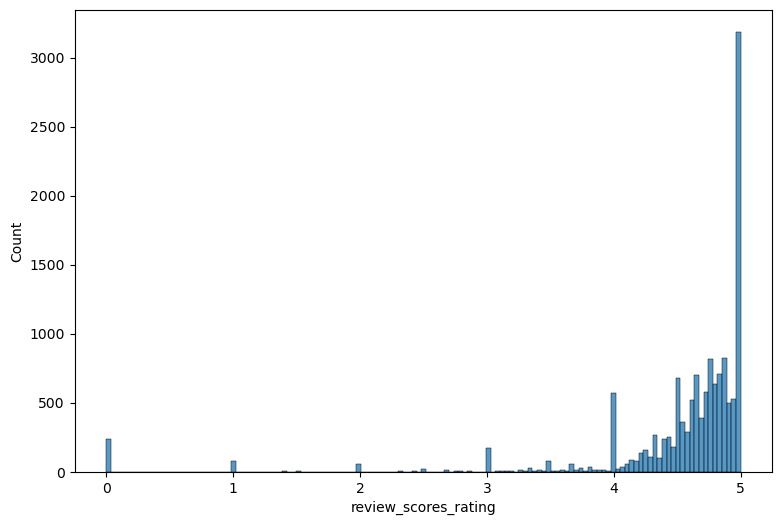

In [128]:
plt.figure(figsize = (9,6))
sns.histplot(x='review_scores_rating', data = df)
plt.show()

Reviso la cantidad de nulos y su % con respecto al total.

In [129]:
df.review_scores_rating.isna().sum()

5029

In [130]:
(df.review_scores_rating.isna().sum()/len(df)).round(2)*100

27.0

Un 27% de nulos es un dato muy elevado. Voy a realizar el análisis sin tener en cuenta los datos nulos. 

In [131]:
df_reviews_sin_nulos = df.dropna(subset='review_scores_rating')

In [132]:
df_reviews_sin_nulos.shape

(13877, 34)

In [133]:
df_reviews_sin_nulos.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

### 2. Media de puntuación en las reviews por tipo de propietarios

In [134]:
df_reviews_sin_nulos.groupby('propietarios_disc')['review_scores_rating'].mean().round(2)

propietarios_disc
01_individual             4.53
02_pequeños_inversores    4.63
03_grandes_inversores     4.57
04_grandes_empresas       4.45
Name: review_scores_rating, dtype: float64

### 3. Porcentaje de reviews por tipo de propietario

In [135]:
df_reviews_sin_nulos.loc[df_reviews_sin_nulos['review_scores_rating'] >=0,'propietarios_disc'].value_counts(normalize = True).round(2)*100

propietarios_disc
01_individual             42.0
02_pequeños_inversores    29.0
04_grandes_empresas       16.0
03_grandes_inversores     13.0
Name: proportion, dtype: float64

In [136]:
(df_reviews_sin_nulos[df_reviews_sin_nulos['review_scores_rating'] >=4].count())/ (df_reviews_sin_nulos[df_reviews_sin_nulos['review_scores_rating'] >=0].count())


id                                0.933919
host_id                           0.933919
host_is_superhost                 0.933919
name                              0.933919
host_name                         0.933987
host_since                        0.933987
amenities                         0.933919
host_listings_count               0.933987
neighbourhood_cleansed            0.933919
neighbourhood_group_cleansed      0.933919
latitude                          0.933919
longitude                         0.933919
property_type                     0.933919
room_type                         0.933919
accommodates                      0.933919
bedrooms                          0.933919
beds                              0.933919
price                             0.933919
minimum_nights                    0.933919
maximum_nights                    0.933919
number_of_reviews                 0.933919
review_scores_rating              0.933919
calculated_host_listings_count    0.933919
bathrooms  

In [137]:
(df_reviews_sin_nulos[df_reviews_sin_nulos['review_scores_rating'] < 4].count())/ (df_reviews_sin_nulos[df_reviews_sin_nulos['review_scores_rating'] >=0].count())


id                                0.066081
host_id                           0.066081
host_is_superhost                 0.066081
name                              0.066081
host_name                         0.066013
host_since                        0.066013
amenities                         0.066081
host_listings_count               0.066013
neighbourhood_cleansed            0.066081
neighbourhood_group_cleansed      0.066081
latitude                          0.066081
longitude                         0.066081
property_type                     0.066081
room_type                         0.066081
accommodates                      0.066081
bedrooms                          0.066081
beds                              0.066081
price                             0.066081
minimum_nights                    0.066081
maximum_nights                    0.066081
number_of_reviews                 0.066081
review_scores_rating              0.066081
calculated_host_listings_count    0.066081
bathrooms  

### 4. Porcentaje de reviews por encima o igual a 4 y por debajo de 4, en función del tipo de propietario.

Porcentaje de reviews dados igual o por encima de 4 en función del tipo de propietarios

In [138]:
df_reviews_sin_nulos.query('review_scores_rating >=4')['propietarios_disc'].value_counts()


propietarios_disc
01_individual             5468
02_pequeños_inversores    3795
04_grandes_empresas       2024
03_grandes_inversores     1673
Name: count, dtype: int64

In [139]:
df_reviews_sin_nulos.query('review_scores_rating >=4')['propietarios_disc'].value_counts(normalize=True).round(2)*100

propietarios_disc
01_individual             42.0
02_pequeños_inversores    29.0
04_grandes_empresas       16.0
03_grandes_inversores     13.0
Name: proportion, dtype: float64

Porcentaje de reviews dados por debajo de 4 en función del tipo de propietarios

In [140]:
df_reviews_sin_nulos.query('review_scores_rating < 4')['propietarios_disc'].value_counts()


propietarios_disc
01_individual             398
04_grandes_empresas       239
02_pequeños_inversores    171
03_grandes_inversores     109
Name: count, dtype: int64

In [141]:
df_reviews_sin_nulos.query('review_scores_rating < 4')['propietarios_disc'].value_counts(normalize=True).round(2)*100

propietarios_disc
01_individual             43.0
04_grandes_empresas       26.0
02_pequeños_inversores    19.0
03_grandes_inversores     12.0
Name: proportion, dtype: float64

### 5. Porcentaje de reviews según la segmentación del mercado

In [142]:
df_reviews_sin_nulos.loc[df_reviews_sin_nulos['review_scores_rating'] >=0,'segmentacion_mercado'].value_counts()

segmentacion_mercado
mayoria_mercado         13580
lujo                      296
oportunismo_champion        1
Name: count, dtype: int64

In [143]:
df_reviews_sin_nulos.loc[df_reviews_sin_nulos['review_scores_rating'] >=0,'segmentacion_mercado'].value_counts(normalize=True).round(3)*100

segmentacion_mercado
mayoria_mercado         97.9
lujo                     2.1
oportunismo_champion     0.0
Name: proportion, dtype: float64

### 6. Nº de reviews y media de valoración por características vivienda

In [144]:
df_reviews_sin_nulos.groupby('bedrooms').agg({'review_scores_rating': ['count', 'mean']}).round(2)

review_scores_rating      
                        count  mean
bedrooms                           
1                        9833  4.55
2                        2787  4.54
3                         922  4.57
4                         226  4.63
5                          75  4.57
6                          17  4.41
7                           8  4.73
8                           6  4.68
9                           1  4.00
15                          1  4.33
18                          1  5.00

In [145]:
df_reviews_sin_nulos.groupby('beds').agg({'review_scores_rating': ['count', 'mean']})

review_scores_rating          
                    count      mean
beds                               
0                     429  4.447389
1                    6278  4.538907
2                    3732  4.560335
3                    1787  4.568719
4                     902  4.583825
5                     378  4.562487
6                     178  4.473539
7                      60  4.556833
8                      55  4.522909
9                      19  4.630000
10                     32  4.769375
11                      5  4.700000
12                      5  4.704000
13                      4  4.772500
14                      4  4.815000
15                      1  4.380000
16                      4  4.785000
17                      2  4.760000
18                      1  4.400000
23                      1  4.330000

In [146]:
df_reviews_sin_nulos.groupby('bathrooms').agg({
    'review_scores_rating': ['count', 'mean']
})


review_scores_rating          
                         count      mean
bathrooms                               
0.0                         62  4.516774
1.0                      10003  4.541589
1.5                       1194  4.548342
2.0                       2072  4.554382
2.5                        147  4.736190
3.0                        240  4.669375
3.5                         23  4.579565
4.0                         75  4.611467
4.5                         21  4.716190
5.0                         14  4.782143
5.5                          5  4.572000
6.0                          9  4.673333
6.5                          1  4.890000
7.0                          2  4.450000
8.0                          4  4.820000
10.0                         1  4.750000
11.0                         4  4.585000

### 7. Nº de reviews y media de valoración por distrito

In [147]:
df_reviews_sin_nulos.groupby('distrito').agg({
    'review_scores_rating': ['count', 'mean']
}).round(2)


review_scores_rating      
                                     count  mean
distrito                                        
Arganzuela                             811  4.55
Barajas                                101  4.67
Carabanchel                            440  4.41
Centro                                6794  4.58
Chamartín                              371  4.52
Chamberí                               758  4.47
Ciudad Lineal                          398  4.65
Fuencarral - El Pardo                  188  4.52
Hortaleza                              269  4.58
Latina                                 359  4.45
Moncloa - Aravaca                      360  4.62
Moratalaz                               67  4.38
Puente de Vallecas                     384  4.48
Retiro                                 490  4.58
Salamanca                              910  4.45
San Blas - Canillejas                  224  4.52
Tetuán                                 543  4.54
Usera                                  196  4.55
Vicálvaro                               37  4.46
Villa de Vallecas                       70  4.33
Villaverde                             107  4.38

### 8. Nº de reviews y media de valoración si es o no super_host y por tipo de propietario

In [148]:
df_reviews_sin_nulos.groupby(['host_is_superhost','propietarios_disc']).agg({
    'review_scores_rating': ['count', 'mean']
}).round(2)

review_scores_rating      
                                                        count  mean
host_is_superhost propietarios_disc                                
f                 01_individual                          4628  4.44
                  02_pequeños_inversores                 2760  4.54
                  03_grandes_inversores                  1277  4.48
                  04_grandes_empresas                    1914  4.39
t                 01_individual                          1238  4.85
                  02_pequeños_inversores                 1206  4.84
                  03_grandes_inversores                   505  4.79
                  04_grandes_empresas                     349  4.79

## Relaciones entre otros factores

### Precio de alquiler medio vs se super_host o no

In [149]:
df.columns

Index(['id', 'host_id', 'host_is_superhost', 'name', 'host_name', 'host_since',
       'amenities', 'host_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'calculated_host_listings_count', 'bathrooms',
       'distrito', 'precio_m2', 'price_disc', 'accommodates_disc',
       'propietarios_disc', 'price_accommodates', 'price_bedrooms',
       'antiguedad_host', 'champion', 'segmentacion_mercado'],
      dtype='object')

In [150]:
df.groupby(['host_is_superhost','room_type'])['price'].median()

host_is_superhost  room_type      
f                  Entire home/apt     83.0
                   Hotel room         105.5
                   Private room        33.0
                   Shared room         23.0
t                  Entire home/apt     81.0
                   Hotel room          99.5
                   Private room        31.0
                   Shared room         15.0
Name: price, dtype: float64

In [151]:
df_reviews_sin_nulos.groupby(['host_is_superhost','propietarios_disc']).agg({
    'review_scores_rating': ['count', 'mean','max',lambda x: x.quantile(0.25),'median']
}).round(2)

review_scores_rating             \
                                                        count  mean  max   
host_is_superhost propietarios_disc                                        
f                 01_individual                          4628  4.44  5.0   
                  02_pequeños_inversores                 2760  4.54  5.0   
                  03_grandes_inversores                  1277  4.48  5.0   
                  04_grandes_empresas                    1914  4.39  5.0   
t                 01_individual                          1238  4.85  5.0   
                  02_pequeños_inversores                 1206  4.84  5.0   
                  03_grandes_inversores                   505  4.79  5.0   
                  04_grandes_empresas                     349  4.79  5.0   

                                                            
                                         <lambda_0> median  
host_is_superhost propietarios_disc                         
f                 01_individual                4.50   4.75  
                  02_pequeños_inversores       4.46   4.68  
                  03_grandes_inversores        4.38   4.63  
                  04_grandes_empresas          4.19   4.50  
t                 01_individual                4.79   4.88  
                  02_pequeños_inversores       4.78   4.88  
                  03_grandes_inversores        4.72   4.83  
                  04_grandes_empresas          4.70   4.82

In [152]:
df_reviews_sin_nulos.groupby(['host_is_superhost','propietarios_disc'])['review_scores_rating'].describe().round(2)

count  mean   std  min   25%   50%  \
host_is_superhost propietarios_disc                                             
f                 01_individual           4628.0  4.44  1.08  0.0  4.50  4.75   
                  02_pequeños_inversores  2760.0  4.54  0.68  0.0  4.46  4.68   
                  03_grandes_inversores   1277.0  4.48  0.62  0.0  4.38  4.63   
                  04_grandes_empresas     1914.0  4.39  0.66  0.0  4.19  4.50   
t                 01_individual           1238.0  4.85  0.14  3.0  4.79  4.88   
                  02_pequeños_inversores  1206.0  4.84  0.18  3.0  4.78  4.88   
                  03_grandes_inversores    505.0  4.79  0.23  3.0  4.72  4.83   
                  04_grandes_empresas      349.0  4.79  0.21  3.0  4.70  4.82   

                                           75%  max  
host_is_superhost propietarios_disc                  
f                 01_individual           5.00  5.0  
                  02_pequeños_inversores  4.90  5.0  
                  03_grandes_inversores   4.81  5.0  
                  04_grandes_empresas     4.78  5.0  
t                 01_individual           4.94  5.0  
                  02_pequeños_inversores  4.95  5.0  
                  03_grandes_inversores   4.95  5.0  
                  04_grandes_empresas     4.94  5.0

### Tipo de propietario, valor de reviews, superhost y tipo de oferta (Entire home/apt)

In [153]:
lista_propietarios = df_reviews_sin_nulos['propietarios_disc'].unique()
lista_room_type = df_reviews_sin_nulos['room_type'].unique()
lista_superhost = df_reviews_sin_nulos['host_is_superhost'].unique()

In [154]:
analisis_general(df_reviews_sin_nulos,lista_propietarios,lista_room_type,lista_superhost)

,count,mean,median
price,858.0,38.283217,30.0
precio_m2,858.0,4619.565268,4595.0
bedrooms,858.0,1.080420,1.0
beds,858.0,1.129371,1.0
accommodates,858.0,1.635198,2.0
...,...,...,...
beds,0.0,NaN,NaN
accommodates,0.0,NaN,NaN
bathrooms,0.0,NaN,NaN
minimum_nights,0.0,NaN,NaN


#### 01_individual, Entire home/apt, superhost = f

In [155]:
df_reviews_sin_nulos.query('propietarios_disc == "01_individual" and review_scores_rating > 4.75 and host_is_superhost == "f" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,1197.0,26327522.58,24805.0,15373868.0,24293660.0,39013815.0,51958488.0,14497884.65
host_id,1197.0,111524763.77,17453.0,17753279.0,66881515.0,176237087.0,417520866.0,116011140.04
host_since,1197,2016-05-21 00:49:19.398496256,2009-05-17 00:00:00,2014-07-10 00:00:00,2016-04-18 00:00:00,2018-03-02 00:00:00,2021-08-08 00:00:00,NaN
host_listings_count,1197.0,1.07,0.0,1.0,1.0,1.0,22.0,1.25
latitude,1197.0,40.42,40.34,40.41,40.42,40.43,40.51,0.02
longitude,1197.0,-3.7,-3.81,-3.71,-3.7,-3.69,-3.57,0.02
accommodates,1197.0,3.61,1.0,2.0,4.0,4.0,16.0,1.66
bedrooms,1197.0,1.56,1.0,1.0,1.0,2.0,5.0,0.77
beds,1197.0,2.11,0.0,1.0,2.0,3.0,12.0,1.29
price,1197.0,89.43,1.0,57.0,77.0,103.0,300.0,48.69


#### 01_individual, Entire home/apt, superhost = t

In [156]:
df_reviews_sin_nulos.query('propietarios_disc == "01_individual" and review_scores_rating > 4.88 and host_is_superhost == "t" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,340.0,25518269.39,261878.0,16244351.0,23427276.5,36375374.75,51817414.0,13076771.29
host_id,340.0,105421789.75,538165.0,20477923.25,66582588.0,163735095.75,392375088.0,103875147.28
host_since,340,2016-04-24 15:23:17.647058944,2011-04-26 00:00:00,2014-09-12 00:00:00,2016-04-26 00:00:00,2017-12-19 18:00:00,2021-03-13 00:00:00,NaN
host_listings_count,340.0,1.19,0.0,1.0,1.0,1.0,9.0,0.99
latitude,340.0,40.42,40.36,40.41,40.42,40.43,40.5,0.02
longitude,340.0,-3.69,-3.76,-3.71,-3.7,-3.69,-3.57,0.03
accommodates,340.0,3.82,1.0,2.0,4.0,4.0,10.0,1.59
bedrooms,340.0,1.62,1.0,1.0,1.0,2.0,5.0,0.8
beds,340.0,2.36,0.0,1.0,2.0,3.0,8.0,1.28
price,340.0,93.68,1.26,62.0,80.5,107.0,299.0,47.9


#### 02_pequeños_inversores, Entire home/apt, superhost = f

In [157]:
df_reviews_sin_nulos.query('propietarios_disc == "02_pequeños_inversores" and review_scores_rating > 4.68 and host_is_superhost == "f" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,657.0,28342088.86,47957.0,17809905.0,29074426.0,40288020.0,51725693.0,14415459.13
host_id,657.0,119716504.03,67353.0,20819114.0,78776620.0,192794786.0,413137791.0,115956480.07
host_since,657,2016-07-15 06:34:31.232876800,2010-01-03 00:00:00,2014-09-01 00:00:00,2016-06-20 00:00:00,2018-06-01 00:00:00,2021-07-15 00:00:00,NaN
host_listings_count,657.0,3.49,0.0,2.0,2.0,4.0,203.0,8.79
latitude,657.0,40.42,40.34,40.41,40.42,40.43,40.51,0.02
longitude,657.0,-3.7,-3.75,-3.71,-3.7,-3.69,-3.58,0.02
accommodates,657.0,4.08,1.0,3.0,4.0,5.0,14.0,1.85
bedrooms,657.0,1.61,1.0,1.0,1.0,2.0,6.0,0.83
beds,657.0,2.34,0.0,1.0,2.0,3.0,11.0,1.42
price,657.0,96.82,1.26,60.0,81.0,120.0,300.0,52.88


#### 02_pequeños_inversores, Entire home/apt, superhost = t

In [158]:
df_reviews_sin_nulos.query('propietarios_disc == "02_pequeños_inversores" and review_scores_rating > 4.88 and host_is_superhost == "t" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,345.0,29547741.79,205199.0,20069006.0,30577776.0,41169978.0,51572195.0,13348026.36
host_id,345.0,104270006.46,124972.0,17608059.0,57548030.0,160262544.0,392061552.0,107591074.66
host_since,345,2016-03-25 06:24:00,2010-05-14 00:00:00,2014-07-03 00:00:00,2016-02-07 00:00:00,2017-11-27 00:00:00,2021-03-11 00:00:00,NaN
host_listings_count,345.0,2.9,0.0,2.0,3.0,4.0,14.0,1.98
latitude,345.0,40.42,40.35,40.41,40.42,40.43,40.49,0.02
longitude,345.0,-3.7,-3.75,-3.71,-3.7,-3.7,-3.58,0.02
accommodates,345.0,4.04,1.0,2.0,4.0,6.0,12.0,2.01
bedrooms,345.0,1.63,1.0,1.0,1.0,2.0,6.0,0.82
beds,345.0,2.38,0.0,1.0,2.0,3.0,9.0,1.39
price,345.0,97.18,1.36,62.0,81.0,120.0,300.0,54.86


#### 03_grandes_inversores, Entire home/apt, superhost = f

In [159]:
df_reviews_sin_nulos.query('propietarios_disc == "03_grandes_inversores" and review_scores_rating > 4.63 and host_is_superhost == "f" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,421.0,29846501.47,119389.0,19976306.0,30531644.0,40823385.0,52108468.0,13670078.86
host_id,421.0,113536189.09,53526.0,14626191.0,80473977.0,198446015.0,413813864.0,116885705.23
host_since,421,2016-03-21 00:10:15.676959744,2009-11-12 00:00:00,2014-04-23 00:00:00,2016-06-28 00:00:00,2018-06-27 00:00:00,2021-07-19 00:00:00,NaN
host_listings_count,421.0,12.53,0.0,7.0,9.0,13.0,63.0,12.18
latitude,421.0,40.42,40.33,40.41,40.42,40.43,40.5,0.02
longitude,421.0,-3.7,-3.78,-3.71,-3.7,-3.7,-3.63,0.01
accommodates,421.0,4.37,1.0,3.0,4.0,6.0,16.0,2.24
bedrooms,421.0,1.68,1.0,1.0,1.0,2.0,8.0,0.98
beds,421.0,2.65,0.0,2.0,2.0,3.0,14.0,1.69
price,421.0,113.83,1.14,71.0,100.0,136.0,300.0,58.42


#### 03_grandes_inversores, Entire home/apt, superhost = t

In [160]:
df_reviews_sin_nulos.query('propietarios_disc == "03_grandes_inversores" and review_scores_rating > 4.83 and host_is_superhost == "t" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,210.0,31046440.18,1082218.0,20814548.25,32320076.5,42543284.75,51973214.0,13575933.02
host_id,210.0,123233988.06,927713.0,14165037.5,61697759.5,216203351.0,395936662.0,127783721.3
host_since,210,2016-05-29 04:20:34.285714176,2011-08-05 00:00:00,2014-03-29 00:00:00,2016-03-05 12:00:00,2018-09-19 00:00:00,2021-04-07 00:00:00,NaN
host_listings_count,210.0,8.38,0.0,6.0,8.0,11.0,61.0,7.65
latitude,210.0,40.42,40.39,40.41,40.42,40.43,40.48,0.01
longitude,210.0,-3.7,-3.77,-3.71,-3.7,-3.7,-3.64,0.02
accommodates,210.0,3.9,1.0,3.0,4.0,4.0,16.0,2.05
bedrooms,210.0,1.48,1.0,1.0,1.0,2.0,5.0,0.77
beds,210.0,2.36,0.0,1.0,2.0,3.0,10.0,1.54
price,210.0,100.68,7.11,70.0,93.5,124.0,300.0,47.54


#### 04_grandes_empresas, Entire home/apt, superhost = f

In [161]:
df_reviews_sin_nulos.query('propietarios_disc == "04_grandes_empresas" and review_scores_rating > 4.50 and host_is_superhost == "f" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,733.0,32404926.62,150123.0,19919009.0,33893251.0,47070653.0,51759520.0,14643507.29
host_id,733.0,97031895.9,596469.0,14032635.0,40877988.0,107141654.0,394687867.0,117884252.05
host_since,733,2015-12-16 10:28:38.963165184,2011-05-17 00:00:00,2014-04-08 00:00:00,2015-08-08 00:00:00,2016-12-13 00:00:00,2021-03-29 00:00:00,NaN
host_listings_count,733.0,65.11,0.0,20.0,36.0,94.0,212.0,61.4
latitude,733.0,40.42,40.39,40.41,40.42,40.42,40.49,0.01
longitude,733.0,-3.7,-3.74,-3.71,-3.7,-3.69,-3.64,0.01
accommodates,733.0,4.27,1.0,3.0,4.0,6.0,16.0,1.83
bedrooms,733.0,1.65,1.0,1.0,1.0,2.0,8.0,0.86
beds,733.0,2.44,0.0,1.0,2.0,3.0,10.0,1.39
price,733.0,106.01,1.14,70.0,94.0,129.0,300.0,50.57


#### 04_grandes_empresas, Entire home/apt, superhost = t

In [162]:
df_reviews_sin_nulos.query('propietarios_disc == "04_grandes_empresas" and review_scores_rating > 4.82 and host_is_superhost == "t" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round().T


,count,mean,min,25%,50%,75%,max,std
id,148.0,36431035.0,1458472.0,27486950.0,39664971.0,45482526.0,51679964.0,11544928.0
host_id,148.0,108997475.0,4615520.0,28786243.0,112373304.0,197974523.0,329629714.0,93526132.0
host_since,148,2016-07-06 12:00:00,2013-01-07 00:00:00,2015-03-05 00:00:00,2017-01-20 00:00:00,2018-06-25 00:00:00,2020-01-21 00:00:00,NaN
host_listings_count,148.0,46.0,1.0,21.0,49.0,75.0,81.0,28.0
latitude,148.0,40.0,40.0,40.0,40.0,40.0,41.0,0.0
longitude,148.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,0.0
accommodates,148.0,4.0,2.0,3.0,4.0,5.0,10.0,1.0
bedrooms,148.0,2.0,1.0,1.0,1.0,2.0,5.0,1.0
beds,148.0,2.0,0.0,2.0,2.0,3.0,8.0,1.0
price,148.0,127.0,1.0,85.0,110.0,176.0,298.0,58.0


### Tipo de propietario, valor de reviews, superhost y tipo de oferta (Private room)

#### 01_individual, Private room, superhost = f

In [163]:
df_reviews_sin_nulos.query('propietarios_disc == "01_individual" and review_scores_rating > 4.75 and host_is_superhost == "f" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,1027.0,28455821.66,59923.0,18474916.5,28879760.0,40095711.0,52008642.0,13809646.2
host_id,1027.0,128950619.5,135579.0,26921558.5,89635464.0,212353596.5,417108366.0,116838656.62
host_since,1027,2016-10-20 01:05:54.040896,2010-05-31 00:00:00,2015-02-13 12:00:00,2016-08-18 00:00:00,2018-08-28 12:00:00,2021-08-06 00:00:00,NaN
host_listings_count,1027.0,0.94,0.0,1.0,1.0,1.0,7.0,0.67
latitude,1027.0,40.42,40.34,40.4,40.42,40.43,40.52,0.03
longitude,1027.0,-3.69,-3.79,-3.71,-3.7,-3.67,-3.55,0.04
accommodates,1027.0,1.59,1.0,1.0,2.0,2.0,10.0,0.65
bedrooms,1027.0,1.04,1.0,1.0,1.0,1.0,4.0,0.25
beds,1027.0,1.11,0.0,1.0,1.0,1.0,10.0,0.57
price,1027.0,38.55,5.0,22.0,30.0,44.0,300.0,31.12


#### 01_individual, Private room, superhost = t

In [164]:
df_reviews_sin_nulos.query('propietarios_disc == "01_individual" and review_scores_rating > 4.88 and host_is_superhost == "t" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,222.0,25969817.28,92920.0,16759154.5,27478381.5,36149117.0,51882531.0,13023450.46
host_id,222.0,103655449.92,200731.0,21759938.0,66482053.5,173469870.25,365211905.0,95225907.53
host_since,222,2016-04-18 22:03:14.594594560,2010-08-13 00:00:00,2014-09-24 18:00:00,2016-04-09 00:00:00,2018-02-14 18:00:00,2020-08-31 00:00:00,NaN
host_listings_count,222.0,1.07,0.0,1.0,1.0,1.0,4.0,0.59
latitude,222.0,40.42,40.34,40.4,40.42,40.44,40.49,0.03
longitude,222.0,-3.69,-3.78,-3.71,-3.7,-3.67,-3.57,0.03
accommodates,222.0,1.74,1.0,1.0,2.0,2.0,4.0,0.57
bedrooms,222.0,1.05,1.0,1.0,1.0,1.0,4.0,0.3
beds,222.0,1.22,0.0,1.0,1.0,1.0,4.0,0.56
price,222.0,36.46,1.0,25.0,33.0,40.75,200.0,19.6


#### 02_pequeños_inversores, Private room, superhost = f

In [165]:
df_reviews_sin_nulos.query('propietarios_disc == "02_pequeños_inversores" and review_scores_rating > 4.68 and host_is_superhost == "f" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,654.0,27902365.69,30478.0,16918737.75,30071232.0,39653492.25,52052285.0,14617879.54
host_id,654.0,124093466.13,31622.0,20092052.0,83505402.0,220066930.0,415332186.0,116187194.18
host_since,654,2016-07-20 19:04:57.247706368,2009-08-14 00:00:00,2014-08-16 06:00:00,2016-07-13 00:00:00,2018-10-11 00:00:00,2021-07-26 00:00:00,NaN
host_listings_count,654.0,2.56,0.0,2.0,2.0,3.0,14.0,1.61
latitude,654.0,40.42,40.34,40.4,40.42,40.43,40.49,0.03
longitude,654.0,-3.69,-3.78,-3.71,-3.7,-3.67,-3.57,0.04
accommodates,654.0,1.62,1.0,1.0,2.0,2.0,6.0,0.65
bedrooms,654.0,1.08,1.0,1.0,1.0,1.0,5.0,0.4
beds,654.0,1.12,0.0,1.0,1.0,1.0,4.0,0.55
price,654.0,38.98,5.0,21.0,30.0,43.75,300.0,31.14


#### 02_pequeños_inversores, Entire home/apt, superhost = t

In [166]:
df_reviews_sin_nulos.query('propietarios_disc == "02_pequeños_inversores" and review_scores_rating > 4.88 and host_is_superhost == "t" and room_type == "Entire home/apt" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
id,345.0,29547741.79,205199.0,20069006.0,30577776.0,41169978.0,51572195.0,13348026.36
host_id,345.0,104270006.46,124972.0,17608059.0,57548030.0,160262544.0,392061552.0,107591074.66
host_since,345,2016-03-25 06:24:00,2010-05-14 00:00:00,2014-07-03 00:00:00,2016-02-07 00:00:00,2017-11-27 00:00:00,2021-03-11 00:00:00,NaN
host_listings_count,345.0,2.9,0.0,2.0,3.0,4.0,14.0,1.98
latitude,345.0,40.42,40.35,40.41,40.42,40.43,40.49,0.02
longitude,345.0,-3.7,-3.75,-3.71,-3.7,-3.7,-3.58,0.02
accommodates,345.0,4.04,1.0,2.0,4.0,6.0,12.0,2.01
bedrooms,345.0,1.63,1.0,1.0,1.0,2.0,6.0,0.82
beds,345.0,2.38,0.0,1.0,2.0,3.0,9.0,1.39
price,345.0,97.18,1.36,62.0,81.0,120.0,300.0,54.86


#### 03_grandes_inversores, Private room, superhost = f

In [167]:
df_reviews_sin_nulos.query('propietarios_disc == "03_grandes_inversores" and review_scores_rating > 4.63 and host_is_superhost == "f" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,142.0,33866358.08,925250.0,24835877.75,34149748.0,46442501.0,51426701.0,12912833.14
host_id,142.0,164341931.97,547389.0,35575308.0,186289216.0,260398297.0,414244011.0,128816271.93
host_since,142,2017-05-12 14:32:06.760563456,2011-04-30 00:00:00,2015-06-11 00:00:00,2018-04-25 00:00:00,2019-05-07 00:00:00,2021-07-21 00:00:00,NaN
host_listings_count,142.0,8.89,0.0,6.0,8.0,12.0,53.0,6.24
latitude,142.0,40.42,40.38,40.41,40.42,40.43,40.49,0.02
longitude,142.0,-3.7,-3.78,-3.71,-3.7,-3.7,-3.57,0.03
accommodates,142.0,2.06,1.0,1.0,2.0,2.0,6.0,0.92
bedrooms,142.0,1.29,1.0,1.0,1.0,1.0,18.0,1.59
beds,142.0,1.46,0.0,1.0,1.0,2.0,6.0,0.86
price,142.0,50.25,13.0,25.0,39.0,56.0,197.0,35.62


#### 03_grandes_inversores, Private room, superhost = t

In [168]:
df_reviews_sin_nulos.query('propietarios_disc == "03_grandes_inversores" and review_scores_rating > 4.83 and host_is_superhost == "t" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,31.0,35539320.23,9838814.0,28184727.0,37345298.0,46088830.5,48751663.0,11557561.25
host_id,31.0,189748649.0,1108348.0,79270854.0,145927008.0,296009988.0,393251788.0,135866509.56
host_since,31,2017-08-18 17:01:56.129032192,2011-09-04 00:00:00,2016-06-15 00:00:00,2017-08-14 00:00:00,2019-09-17 12:00:00,2021-03-19 00:00:00,NaN
host_listings_count,31.0,4.97,0.0,2.5,4.0,6.0,14.0,3.85
latitude,31.0,40.42,40.38,40.41,40.42,40.44,40.45,0.02
longitude,31.0,-3.71,-3.77,-3.71,-3.71,-3.7,-3.65,0.03
accommodates,31.0,2.0,1.0,1.5,2.0,2.0,8.0,1.24
bedrooms,31.0,1.1,1.0,1.0,1.0,1.0,4.0,0.54
beds,31.0,1.29,0.0,1.0,1.0,1.0,6.0,0.97
price,31.0,51.13,16.0,26.0,37.0,52.0,279.0,48.85


#### 04_grandes_empresas, Private room, superhost = f

In [169]:
df_reviews_sin_nulos.query('propietarios_disc == "04_grandes_empresas" and review_scores_rating > 4.50 and host_is_superhost == "f" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round(2).T


,count,mean,min,25%,50%,75%,max,std
id,163.0,30789630.91,1628485.0,22242961.5,28997668.0,41039575.5,51360518.0,12556718.87
host_id,163.0,115811414.88,901218.0,61753406.0,112271726.0,132022481.0,409080777.0,84781451.18
host_since,163,2016-09-07 00:26:30.184049152,2011-08-01 00:00:00,2016-03-06 00:00:00,2017-01-19 00:00:00,2017-05-26 00:00:00,2021-06-25 00:00:00,NaN
host_listings_count,163.0,37.34,1.0,18.0,26.0,46.0,115.0,30.45
latitude,163.0,40.42,40.39,40.42,40.42,40.43,40.46,0.01
longitude,163.0,-3.7,-3.73,-3.71,-3.7,-3.7,-3.64,0.02
accommodates,163.0,1.92,1.0,1.0,2.0,2.0,8.0,0.95
bedrooms,163.0,1.04,1.0,1.0,1.0,1.0,4.0,0.28
beds,163.0,1.15,0.0,1.0,1.0,1.0,8.0,0.73
price,163.0,33.79,10.0,20.0,35.0,40.0,108.0,15.44


#### 04_grandes_empresas, Private room, superhost = t

In [170]:
df_reviews_sin_nulos.query('propietarios_disc == "04_grandes_empresas" and review_scores_rating > 4.82 and host_is_superhost == "t" and room_type == "Private room" and segmentacion_mercado == "mayoria_mercado"').describe().round().T


,count,mean,min,25%,50%,75%,max,std
id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_since,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
host_listings_count,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bedrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Barrios con pisos con las características ideales para inversión